In [9916]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier
from scipy.stats import norm, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



#import plotty
import warnings
warnings.filterwarnings('ignore')

In [9917]:
df = pd.read_csv(r"C:\Users\hp-pc\Desktop\Projects\Evaluation\IBM Hr analytics\ibm-hr-analytics-employee-attrition-performance (1)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [9918]:
df # read the csv file

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Documentation

In [9919]:
# 1. Buisness Travel, Department, Attrition, Gender, jobrole, marital status,
#over18, overtime are in object
# 2. EmployyeCount, EmployeeNumber are not important for Attrition analysis
# 3. No Null values are there in our dataset
# 4. No missing values 
# 5. column Over18 and EmployeeCount have same value.
# 6. Some columns have distortion and skewed

In [9920]:
df.columns #Check the columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9921]:
df.describe() #check the mean, std, iqr and quartile range parameters

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9922]:
df.info() #check the null values and datatype in dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9923]:
df.shape #check the shape of the dataset

(1470, 35)

In [9924]:
df.duplicated().sum() #check if there is any duplicate row or not

0

# Column1: Age

In [9925]:
df['Age'].unique() #check the unique value 

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [9926]:
df['Age'].value_counts() #check the number of counts for particular value

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [9927]:
#check the zero value in our column
df['Age'].all() #it shows, there is no zero values

True

In [9928]:
#check the mean, std, iqr and quartile range 
df['Age'].describe() # gap in between iqr and quartile are not proper.

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [9929]:
#check the skewness of the column
df['Age'].skew() #data is closer to zero, hence it is less skewed

0.4132863018563338

In [9930]:
df.groupby('Age')['Attrition'].value_counts() #check the relationship between Age and Attrition

Age  Attrition
18   No            4
     Yes           4
19   Yes           6
     No            3
20   Yes           6
                  ..
57   No            4
58   No            9
     Yes           5
59   No           10
60   No            5
Name: Attrition, Length: 82, dtype: int64

Text(0, 0.5, 'Attrition')

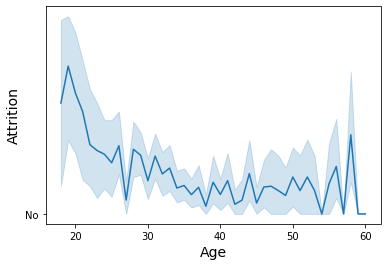

In [9931]:
#visualize this column by lineplot
sns.lineplot(x= 'Age', y = 'Attrition', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

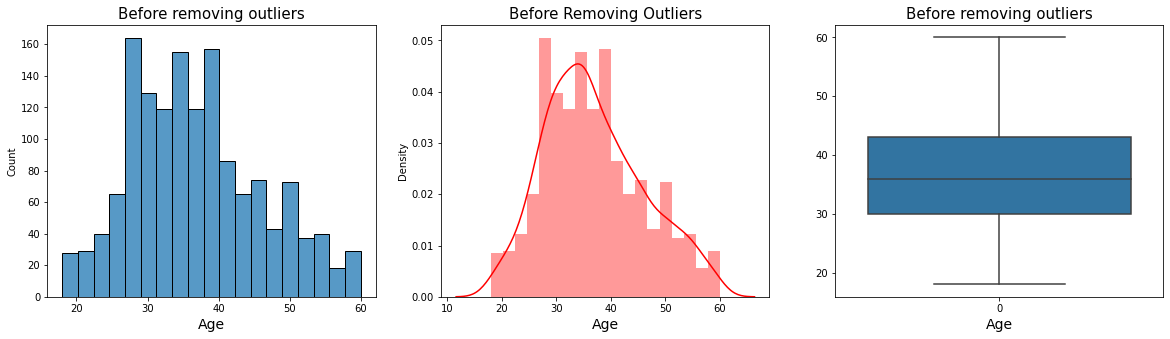

In [9932]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Age']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Age'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Age']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Age', fontsize= 14)
plt.show()

In [9933]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Age'].mean())
print('Median of the column:----->',df['Age'].median())
print('Mode of the column:----->',st.mode(df['Age']))
print('std of the column:----->',df['Age'].std())

Mean of the column:-----> 36.923809523809524
Median of the column:-----> 36.0
Mode of the column:-----> 35
std of the column:-----> 9.135373489136734


In [9934]:
df['Age'] = df['Age'].replace(35, df['Age'].mean()) #replace mode by mean value

In [9935]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Age'].mean())
print('Median of the column:----->',df['Age'].median())
print('Mode of the column:----->',st.mode(df['Age']))
print('std of the column:----->',df['Age'].std())

Mean of the column:-----> 37.02588921282803
Median of the column:-----> 36.923809523809524
Mode of the column:-----> 36.923809523809524
std of the column:-----> 9.12403999704603


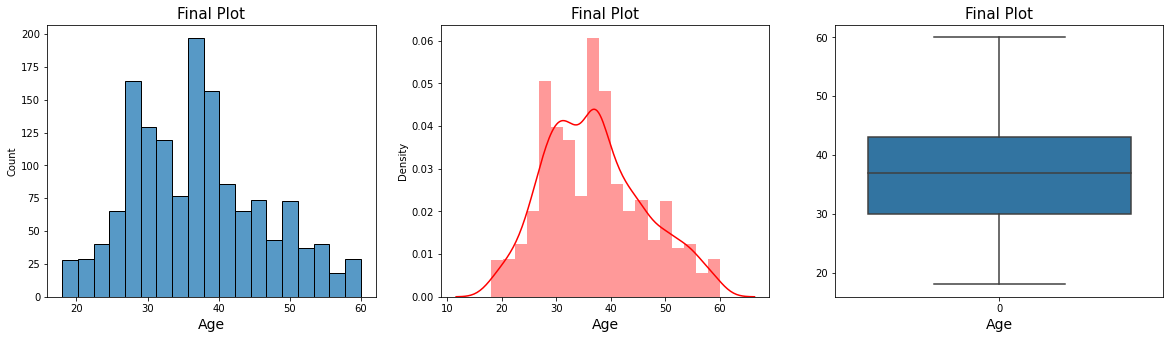

In [9936]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Age']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Age'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Age']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)
plt.show()

In [9937]:
df['Age'].skew() #Now, check the skewness of our column

0.3817156200863514

Observation: 
1. At the age of less than 23 or 25, the attrition is higher
2. As teh experience increases, the attrition is going low.
3. By seeing, distplot, there is little skewness in our column
4. by replacing mode value to column mean, we try to remove this skewness
5. by seeing, boxplot, there is no outliers in this column
6. Now, Mean, median and Mode values are approximately equal to each other.
7. Earlier, skewness is 0.41 but after replacement of mode value, it improves to 0.38.

In [9938]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1470, 35)


# Column2: BusinessTravel

In [9939]:
df['BusinessTravel'].unique() #Check the unique value 

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [9940]:
df['BusinessTravel'].value_counts() #check the number of counts for particular value

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [9941]:
df.groupby('BusinessTravel')['Attrition'].value_counts()
#check the relationship between column and label

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64

In [9942]:
#Check the percentage of attrition
print('Attrition for Travel_Rarely in(%)---->', (156/1043)*100)
print('Attrition for Travel_Frequently in(%)---->', (69/277)*100) 
print('Attrition for Non_Travel in(%)----->', (12/138)*100) 

Attrition for Travel_Rarely in(%)----> 14.956855225311601
Attrition for Travel_Frequently in(%)----> 24.90974729241877
Attrition for Non_Travel in(%)-----> 8.695652173913043


Text(0.5, 0, 'Counts')

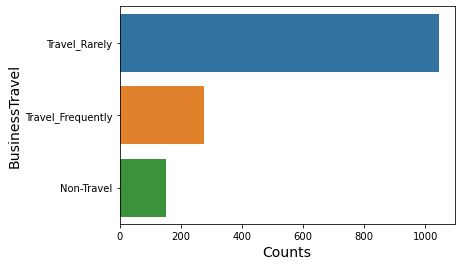

In [9943]:
#visualize this column by lineplot
sns.countplot(y = 'BusinessTravel', data=df)
plt.ylabel('BusinessTravel', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

In [9944]:
lab_enc = LabelEncoder() #use label encoder to Transform this column 

In [9945]:
df_bt = lab_enc.fit_transform(df['BusinessTravel'])

In [9946]:
m = pd.Series(df_bt)

In [9947]:
df['BusinessTravel'] = m #save the values in their respective columns

In [9948]:
df['BusinessTravel'].unique()

array([2, 1, 0])

In [9949]:
df['BusinessTravel'].value_counts()

2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64

In [9950]:
BT = ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
bt1 = [1043,277,150] #making dataframes

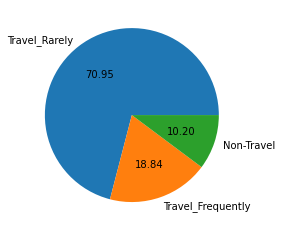

In [9951]:
plt.pie(bt1, labels = BT, autopct = '%.2f')
plt.show() #visualize by pieplot

How Label Encoder determines the value:

0. Non-Travel
1. Travel_Frequently
2. Travel_Rarely 

In [9952]:
#check the skewness of the column
df['BusinessTravel'].skew() #it is not closer to zero, it is highly skewed

-1.4390059727642035

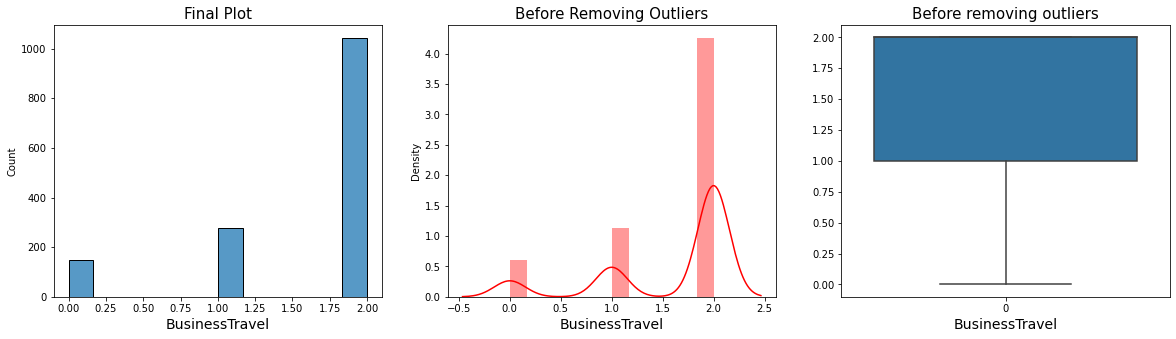

In [9953]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['BusinessTravel']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('BusinessTravel', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['BusinessTravel'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('BusinessTravel', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['BusinessTravel']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('BusinessTravel', fontsize= 14)
plt.show()

In [9954]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['BusinessTravel'].mean())
print('Median of the column:----->',df['BusinessTravel'].median())
print('Mode of the column:----->',st.mode(df['BusinessTravel']))
print('std of the column:----->',df['BusinessTravel'].std())

Mean of the column:-----> 1.607482993197279
Median of the column:-----> 2.0
Mode of the column:-----> 2
std of the column:-----> 0.6654549450695478


Observation:
1. skewness in the data is in minus.
2. people who travel rarely are more as compared to non travel and frequently traveller
3. But when we compare attrition interms of percentage
4. then the attrition of person who Travel_frequently is more than others 
5. value of mean, median and mode is good
6. Attrition for Travel_Rarely in(%)----> 14.956855225311601
7. Attrition for Travel_Frequently in(%)----> 24.90974729241877
8. Attrition for Non_Travel in(%)-----> 8.695652173913043

In [9955]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1470, 35)


# Column3: DailyRate

In [9956]:
df['DailyRate'].unique() #check the unique value

array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093, 1217, 1353,  120,  682,  489,
        807,  827,  871,  665, 1040, 1420,  240, 1280,  534, 1456,  658,
        142, 1127, 1031, 1189, 1354, 1467,  922,  394, 1312,  750,  441,
        684,  249,  841,  147,  528,  594,  470,  957,  542,  802, 1355,
       1150, 1329,  959, 1033, 1316,  364,  438,  689,  201, 1427,  857,
        933, 1181, 1395,  662, 1436,  194,  967, 14

In [9957]:
df['DailyRate'].value_counts() #check the number of counts for particular value

691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64

In [9958]:
#check the zero value
df['DailyRate'].all() #There is no zero value

True

In [9959]:
df['DailyRate'].describe() #check the parameters

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

In [9960]:
df['DailyRate'].skew() #it is closer to zero that means our column is less skewed

-0.003518568352325854

In [9961]:
#check the null value
df['DailyRate'].isnull().sum() #No null values

0

In [9962]:
df.groupby('DailyRate')['Attrition'].value_counts()
#check the relationship between column and label

DailyRate  Attrition
102        No           1
103        Yes          1
104        Yes          1
105        No           1
106        No           1
                       ..
1495       No           3
1496       No           1
           Yes          1
1498       No           1
1499       No           1
Name: Attrition, Length: 1021, dtype: int64

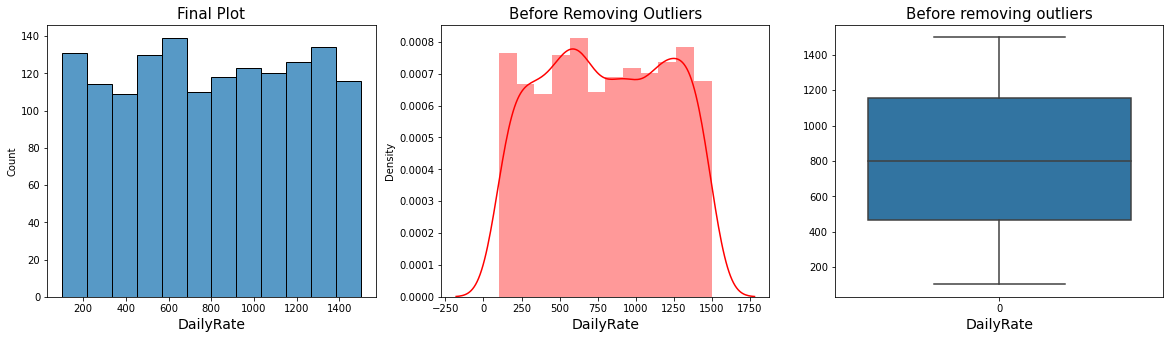

In [9963]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['DailyRate']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('DailyRate', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['DailyRate'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('DailyRate', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['DailyRate']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('DailyRate', fontsize= 14)
plt.show()

In [9964]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['DailyRate'].mean())
print('Median of the column:----->',df['DailyRate'].median())
print('Mode of the column:----->',st.mode(df['DailyRate']))
print('std of the column:----->',df['DailyRate'].std())

Mean of the column:-----> 802.4857142857143
Median of the column:-----> 802.0
Mode of the column:-----> 691
std of the column:-----> 403.50909994352827


In [9965]:
df['DailyRate'] = df['DailyRate'].replace(691,df['DailyRate'].mean()) #replace mode value by mean value

In [9966]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['DailyRate'].mean())
print('Median of the column:----->',df['DailyRate'].median())
print('Mode of the column:----->',st.mode(df['DailyRate']))
print('std of the column:----->',df['DailyRate'].std())

Mean of the column:-----> 802.9407580174927
Median of the column:-----> 802.4857142857143
Mode of the column:-----> 802.4857142857143
std of the column:-----> 403.4459333314947


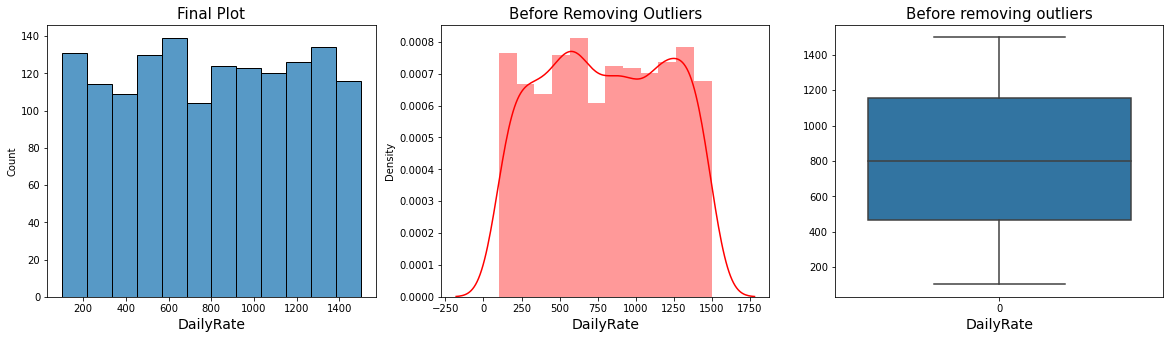

In [9967]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['DailyRate']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('DailyRate', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['DailyRate'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('DailyRate', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['DailyRate']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('DailyRate', fontsize= 14)
plt.show()

In [9968]:
df['DailyRate'].skew() #now, check the skewness

-0.006822208512417261

Observation:
1. No Outliers found
2. No Zero value and no null value found
3. Data is little skewed
4. Values of Mean, Median and mode is good now

In [9969]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1470, 35)


# Column4: Department

In [9970]:
df['Department'].unique() #check the unique value

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [9971]:
df['Department'].value_counts() #check the number of counts for particular value

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [9972]:
df.groupby('Department')['Attrition'].value_counts()
#check the relationship between column and label

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64

In [9973]:
#Check the percentage of attrition
print('Attrition for Human Resources  in(%)---->', (12/63)*100)
print('Attrition for Research & Development in(%)---->', (133/961)*100) 
print('Attrition for Sales in(%)----->', (92/446)*100) 

Attrition for Human Resources  in(%)----> 19.047619047619047
Attrition for Research & Development in(%)----> 13.839750260145681
Attrition for Sales in(%)-----> 20.62780269058296


Text(0.5, 0, 'Counts')

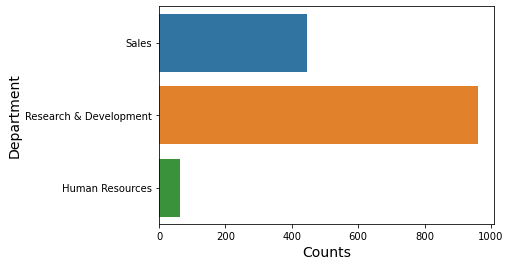

In [9974]:
#visualize this column by lineplot
sns.countplot(y = 'Department', data=df)
plt.ylabel('Department', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

In [9975]:
lab_enc = LabelEncoder() #use label encoder to Transform this column 

In [9976]:
df_dpt = lab_enc.fit_transform(df['Department'])

In [9977]:
m = pd.Series(df_dpt)

In [9978]:
df['Department'] = m #save the values in their respective columns

In [9979]:
df['Department'].unique() #now, check the unique value

array([2, 1, 0])

In [9980]:
df['Department'].isnull().sum() #check the null values

0

In [9981]:
df['Department'].value_counts() #check the number of counts for particular value

1    961
2    446
0     63
Name: Department, dtype: int64

In [9982]:
df['Department'].skew() #check if our data is skewed or not

0.1722308111183741

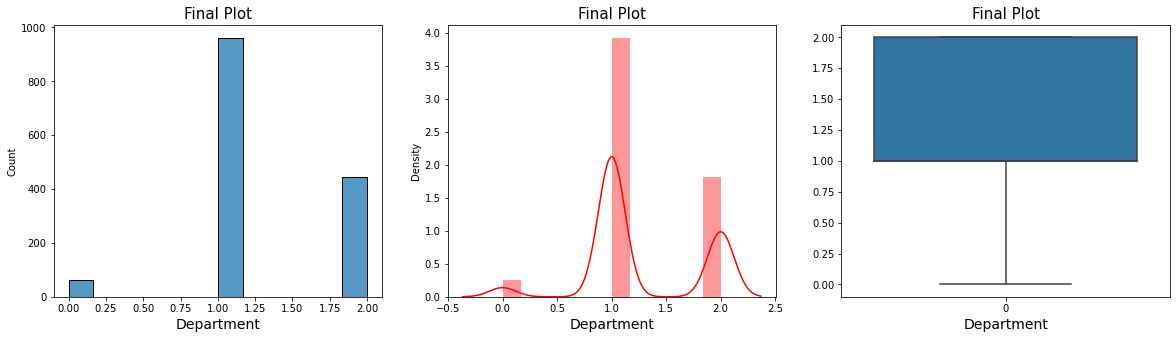

In [9983]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Department']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Department', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Department'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Department', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Department']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Department', fontsize= 14)
plt.show()

In [9984]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Department'].mean())
print('Median of the column:----->',df['Department'].median())
print('Mode of the column:----->',st.mode(df['Department']))
print('std of the column:----->',df['Department'].std())

Mean of the column:-----> 1.260544217687075
Median of the column:-----> 1.0
Mode of the column:-----> 1
std of the column:-----> 0.5277923017973292


Observation:
1. Data have no null values
2. Data is little skewed 0.17
3. Number of peoples are from research & Development
4. But, we see attrition is more in sales in terms of percentage
5. Values of mean, median and mode are good

In [9985]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1470, 35)


# Column5: DistanceFromHome

In [9986]:
df['DistanceFromHome'].unique() #check the unique value

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [9987]:
df['DistanceFromHome'].value_counts() #check the number of counts for particular value

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
17     20
12     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

In [9988]:
df['DistanceFromHome'].all() #check the zero value in our column or not

True

In [9989]:
df['DistanceFromHome'].isnull().sum()#check the null value

0

In [9990]:
df['DistanceFromHome'].describe() #check the mean, std iqr and quartile parameters 

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [9991]:
df['DistanceFromHome'].skew() #check the skewness

0.9581179956568269

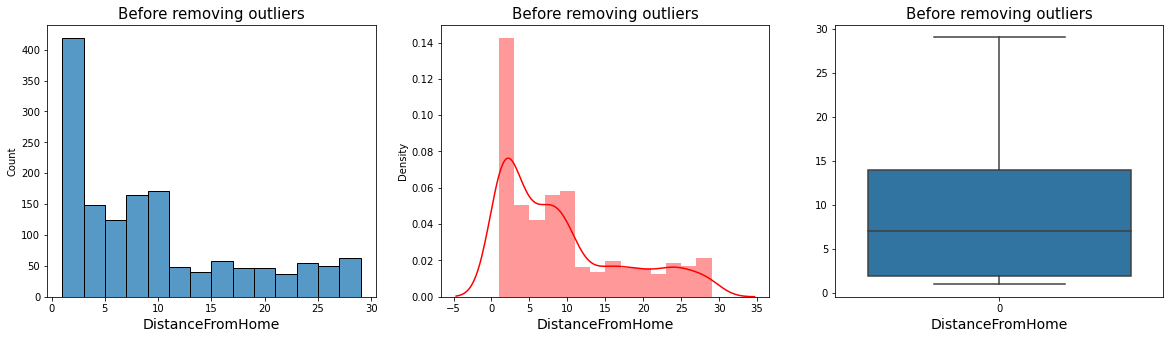

In [9992]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['DistanceFromHome']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['DistanceFromHome'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['DistanceFromHome']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)
plt.show()

In [9993]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['DistanceFromHome'].mean())
print('Median of the column:----->',df['DistanceFromHome'].median())
print('Mode of the column:----->',st.mode(df['DistanceFromHome']))
print('std of the column:----->',df['DistanceFromHome'].std())

Mean of the column:-----> 9.19251700680272
Median of the column:-----> 7.0
Mode of the column:-----> 2
std of the column:-----> 8.106864435666084


In [9994]:
df['DistanceFromHome'] = df['DistanceFromHome'].replace(2, df['DistanceFromHome'].mean())
#we see mean, median, mode value are not good, so, replace mode value by mean value to get better values

In [9995]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['DistanceFromHome'].mean())
print('Median of the column:----->',df['DistanceFromHome'].median())
print('Mode of the column:----->',st.mode(df['DistanceFromHome']))
print('std of the column:----->',df['DistanceFromHome'].std())

Mean of the column:-----> 10.224912305058051
Median of the column:-----> 9.19251700680272
Mode of the column:-----> 9.19251700680272
std of the column:-----> 7.56466191034515


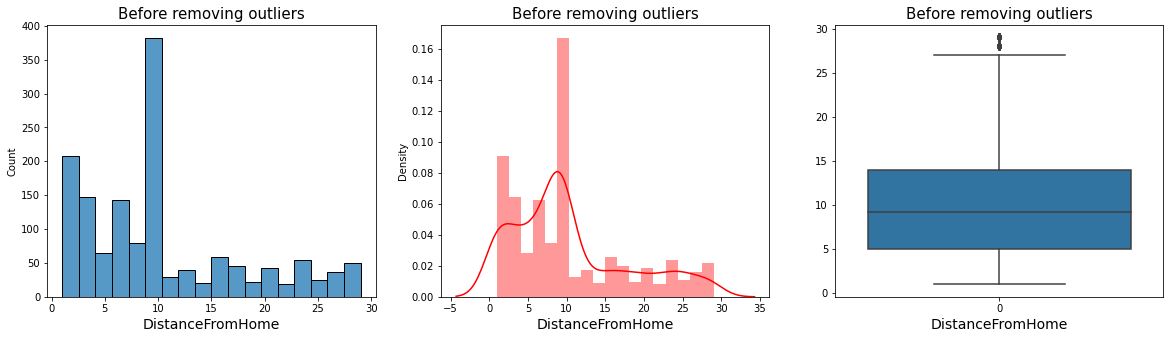

In [9996]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['DistanceFromHome']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['DistanceFromHome'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['DistanceFromHome']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)
plt.show()

In [9997]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['DistanceFromHome'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['DistanceFromHome'], 55,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['DistanceFromHome'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['DistanceFromHome'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 4.192517006802721

 **************************************************
Higher range:-
 (array([   7,    8,    9,   10,   12,   13,   14,   15,   17,   26,   42,
         46,   47,   54,   56,   57,   61,   63,   91,   99,  112,  113,
        119,  120,  121,  126,  127,  129,  130,  132,  134,  138,  141,
        143,  150,  160,  162,  163,  170,  181,  182,  192,  195,  197,
        199,  201,  203,  204,  205,  207,  212,  216,  229,  235,  241,
        242,  243,  253,  254,  259,  266,  268,  271,  276,  283,  286,
        287,  288,  295,  297,  298,  302,  305,  307,  324,  332,  345,
        348,  352,  354,  368,  371,  378,  395,  398,  404,  409,  412,
        413,  418,  421,  423,  424,  425,  427,  430,  438,  439,  440,
        445,  451,  453,  454,  458,  460,  462,  463,  465,  470,  473,
        474,  475,  476,  483,  496,  504,  510,  523,  536,  543,  545,
        547,  558,  563,  566,  570,  572,  575,  591,  594,  601,  604,
       

In [9998]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1470, 35)
New Shape:------>  (1141, 35)


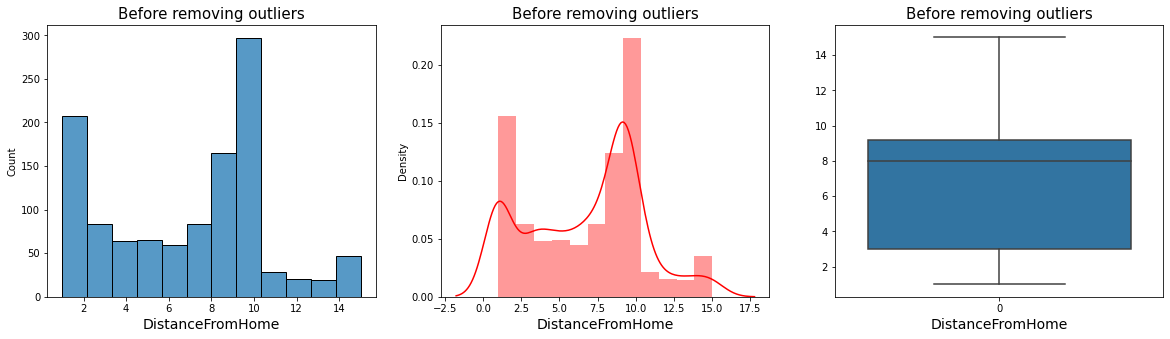

In [9999]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['DistanceFromHome']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['DistanceFromHome'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['DistanceFromHome']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)
plt.show()

In [10000]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['DistanceFromHome'].mean())
print('Median of the column:----->',df['DistanceFromHome'].median())
print('Mode of the column:----->',st.mode(df['DistanceFromHome']))
print('std of the column:----->',df['DistanceFromHome'].std())

Mean of the column:-----> 6.728852838243071
Median of the column:-----> 8.0
Mode of the column:-----> 9.19251700680272
std of the column:-----> 3.7688028475619486


In [10001]:
df['DistanceFromHome'] = df['DistanceFromHome'].replace(9.19251700680272, df['DistanceFromHome'].mean())

In [10002]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['DistanceFromHome'].mean())
print('Median of the column:----->',df['DistanceFromHome'].median())
print('Mode of the column:----->',st.mode(df['DistanceFromHome']))
print('std of the column:----->',df['DistanceFromHome'].std())

Mean of the column:-----> 6.273258500323675
Median of the column:-----> 6.728852838243071
Mode of the column:-----> 6.728852838243071
std of the column:-----> 3.5878559882907775


In [10003]:
df['DistanceFromHome'] = df['DistanceFromHome'].replace(6.728852838243071, df['DistanceFromHome'].mean())

In [10004]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['DistanceFromHome'].mean())
print('Median of the column:----->',df['DistanceFromHome'].median())
print('Mode of the column:----->',st.mode(df['DistanceFromHome']))
print('std of the column:----->',df['DistanceFromHome'].std())

Mean of the column:-----> 6.18900748778995
Median of the column:-----> 6.273258500323675
Mode of the column:-----> 6.273258500323675
std of the column:-----> 3.5815064118861475


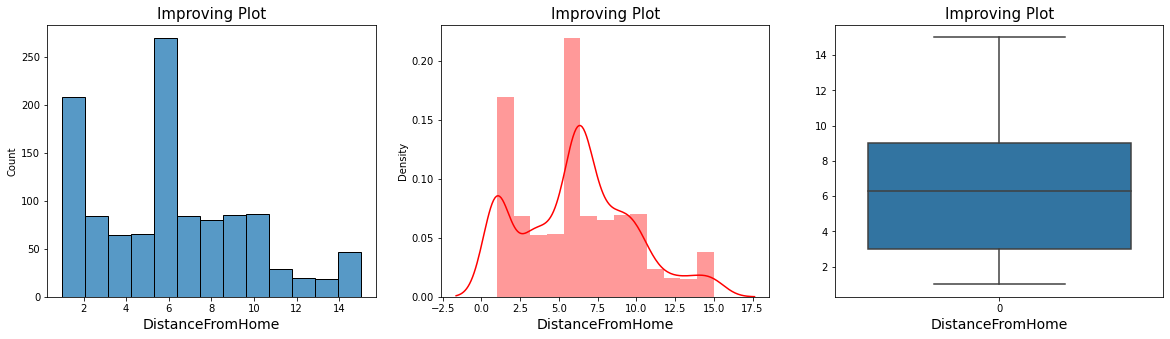

In [10005]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['DistanceFromHome']) #visualize the outliers by using histplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['DistanceFromHome'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['DistanceFromHome']) #visualize the outliers by using boxplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)
plt.show()

In [10006]:
df['DistanceFromHome'].skew()

0.2974535548562074

In [10007]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['DistanceFromHome'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['DistanceFromHome'], 65,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['DistanceFromHome'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['DistanceFromHome'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 4.0

 **************************************************
Higher range:-
 (array([   7,   14,   89,   97,  128,  143,  144,  146,  181,  195,  265,
        294,  303,  339,  365,  369,  380,  414,  426,  469,  476,  487,
        520,  528,  558,  566,  593,  618,  635,  649,  673,  680,  686,
        694,  727,  735,  755,  765,  782,  825,  827,  830,  835,  852,
        870,  874,  885,  899,  908,  923,  957,  960,  973, 1001, 1020,
       1021, 1022, 1039, 1063, 1064, 1075, 1078, 1089, 1108, 1125, 1134],
      dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [10008]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1141, 35)
New Shape:------>  (1075, 35)


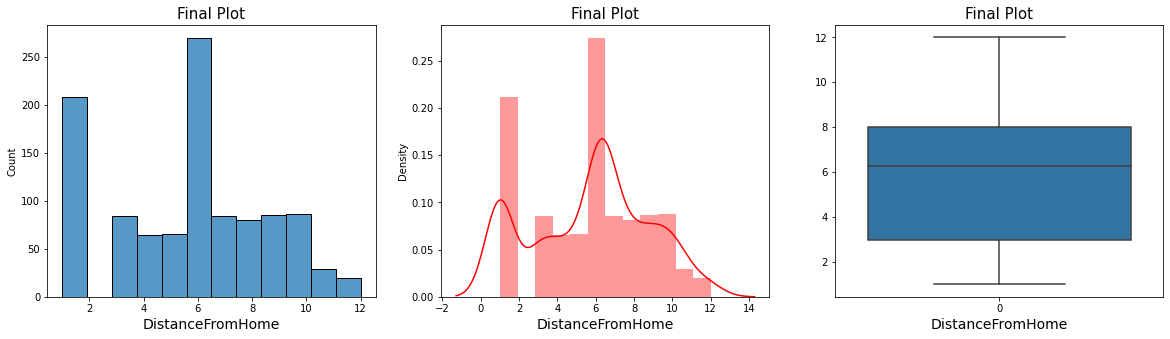

In [10009]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['DistanceFromHome']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['DistanceFromHome'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['DistanceFromHome']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('DistanceFromHome', fontsize= 14)
plt.show()

In [10010]:
df['DistanceFromHome'].skew() #now, check the skewness

-0.10425390309496704

In [10011]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['DistanceFromHome'].mean())
print('Median of the column:----->',df['DistanceFromHome'].median())
print('Mode of the column:----->',st.mode(df['DistanceFromHome']))
print('std of the column:----->',df['DistanceFromHome'].std())

Mean of the column:-----> 5.702937249831001
Median of the column:-----> 6.273258500323675
Mode of the column:-----> 6.273258500323675
std of the column:-----> 3.07992397931748


In [10012]:
df.groupby('DistanceFromHome')['Attrition'].value_counts()
#check the relationship between column and label

DistanceFromHome  Attrition
1.000000          No           182
                  Yes           26
3.000000          No            70
                  Yes           14
4.000000          No            55
                  Yes            9
5.000000          No            55
                  Yes           10
6.000000          No            52
                  Yes            7
6.273259          No           183
                  Yes           28
7.000000          No            73
                  Yes           11
8.000000          No            70
                  Yes           10
9.000000          No            67
                  Yes           18
10.000000         No            75
                  Yes           11
11.000000         No            25
                  Yes            4
12.000000         No            14
                  Yes            6
Name: Attrition, dtype: int64

Text(0.5, 0, 'Counts')

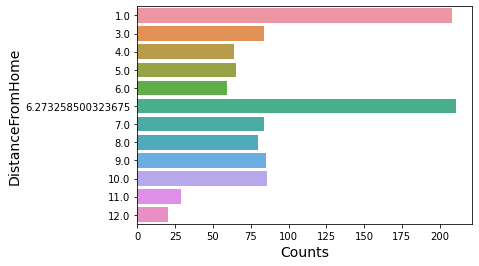

In [10013]:
#visualize this column by lineplot
sns.countplot(y = 'DistanceFromHome', data=df)
plt.ylabel('DistanceFromHome', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

Observation:
1. No null values and no zeros are found 
2. improving skewness from 0.95 to -0.1
3. remove outliers
4. improve mean, mode, median value
5. people are more who are living from 1 or 2 km away from office
6. And percentage of Attrition appromately same for every data.

In [10014]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 35)


# Column6: Education

In [10015]:
df['Education'].unique() #check the unique value

array([2, 1, 4, 3, 5], dtype=int64)

In [10016]:
df['Education'].value_counts() #check the number of counts for particular value

3    422
4    292
2    203
1    126
5     32
Name: Education, dtype: int64

Text(0.5, 0, 'Counts')

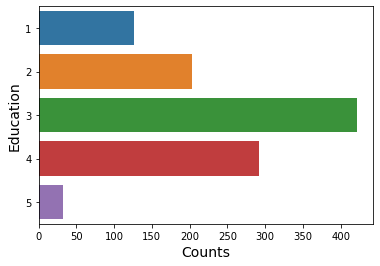

In [10017]:
#visualize this column by lineplot
sns.countplot(y = 'Education', data=df)
plt.ylabel('Education', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

In [10018]:
df['Education'].all() #check the zero value

True

In [10019]:
df.groupby('Education')['Attrition'].value_counts()
#check the relationship between column and label

Education  Attrition
1          No           105
           Yes           21
2          No           175
           Yes           28
3          No           354
           Yes           68
4          No           257
           Yes           35
5          No            30
           Yes            2
Name: Attrition, dtype: int64

In [10020]:
#Check the percentage of attrition
print('Attrition for level-1  in(%)---->', (21/126)*100)
print('Attrition for level-2 in(%)---->', (28/203)*100) 
print('Attrition for level-3 in(%)----->', (68/422)*100) 
print('Attrition for level-4 in(%)---->', (35/292)*100) 
print('Attrition for level-5 in(%)----->', (2/12)*100) 

Attrition for level-1  in(%)----> 16.666666666666664
Attrition for level-2 in(%)----> 13.793103448275861
Attrition for level-3 in(%)-----> 16.113744075829384
Attrition for level-4 in(%)----> 11.986301369863012
Attrition for level-5 in(%)-----> 16.666666666666664


Observation:
1. No null value in data
2. level 3 peoples are more as compared to others
3. but, as we can see the attritiion in terms of percentage are approximately same
4. level-1 & level-5 peoples have high attrition rate

In [10021]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 35)


# Column7: Education field

In [10022]:
df['EducationField'].unique() #check the unique value

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [10023]:
df['EducationField'].value_counts() #check the number of counts for particular value

Life Sciences       446
Medical             337
Marketing           113
Technical Degree     99
Other                61
Human Resources      19
Name: EducationField, dtype: int64

In [10024]:
df.groupby('EducationField')['Attrition'].value_counts()
#check the relationship between column and label

EducationField    Attrition
Human Resources   No            17
                  Yes            2
Life Sciences     No           384
                  Yes           62
Marketing         No            94
                  Yes           19
Medical           No           296
                  Yes           41
Other             No            55
                  Yes            6
Technical Degree  No            75
                  Yes           24
Name: Attrition, dtype: int64

Text(0.5, 0, 'Counts')

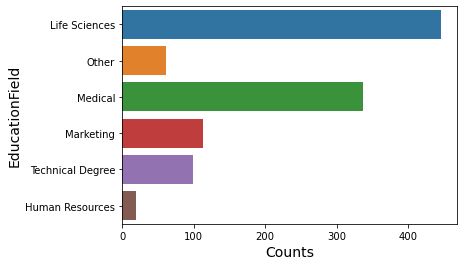

In [10025]:
#visualize this column by lineplot
sns.countplot(y = 'EducationField', data=df)
plt.ylabel('EducationField', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

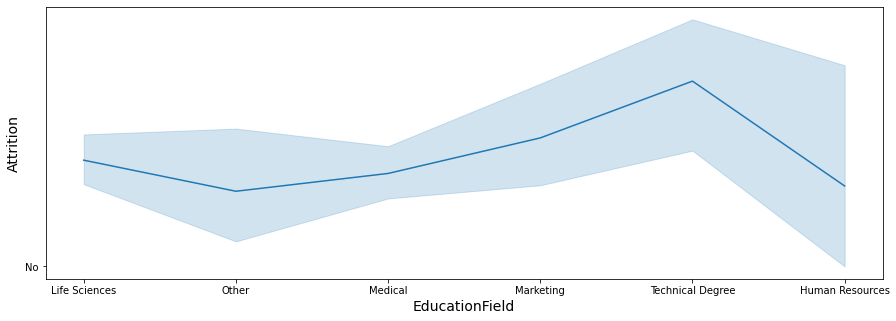

In [10026]:
#visualize this column by lineplot
plt.figure(figsize =(15,5))
sns.lineplot(x= 'EducationField', y = 'Attrition', data=df)
plt.xlabel('EducationField', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10027]:
#Check the percentage of attrition
print('Attrition for Life Science  in(%)---->', (62/446)*100)
print('Attrition Other in(%)---->', (6/61)*100) 
print('Attrition for Medical in(%)----->', (41/337)*100) 
print('Attrition for Marketing in(%)---->', (19/113)*100) 
print('Attrition for Technical degree in(%)----->', (24/99)*100)
print('Attrition for Human resources in(%)----->', (2/19)*100)

Attrition for Life Science  in(%)----> 13.901345291479823
Attrition Other in(%)----> 9.836065573770492
Attrition for Medical in(%)-----> 12.166172106824925
Attrition for Marketing in(%)----> 16.8141592920354
Attrition for Technical degree in(%)-----> 24.242424242424242
Attrition for Human resources in(%)-----> 10.526315789473683


In [10028]:
df['EducationField'] = df['EducationField'].map({'Human Resources':0,'Life Sciences':1, 'Marketing':2,'Medical':3, 'Other':4,'Technical Degree':5 })

In [10029]:
df['EducationField'].value_counts() #check the value counts

1    446
3    337
2    113
5     99
4     61
0     19
Name: EducationField, dtype: int64

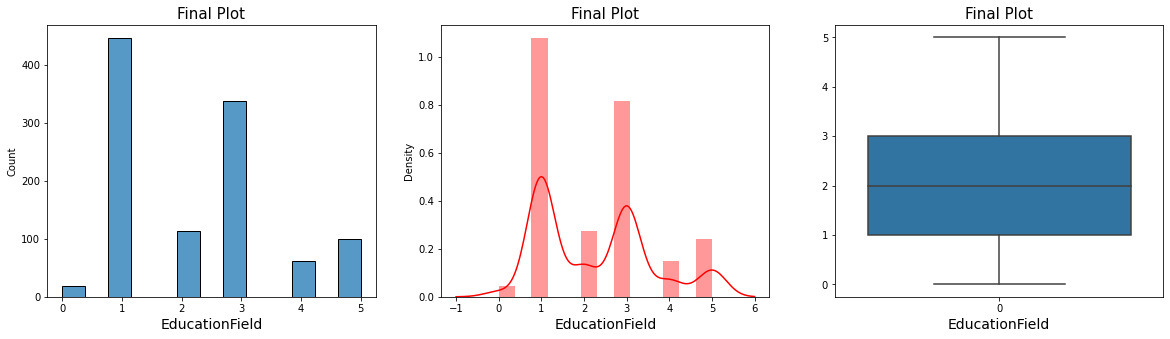

In [10030]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['EducationField']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('EducationField', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['EducationField'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('EducationField', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['EducationField']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('EducationField', fontsize= 14)
plt.show()

In [10031]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['EducationField'].mean())
print('Median of the column:----->',df['EducationField'].median())
print('Mode of the column:----->',st.mode(df['EducationField']))
print('std of the column:----->',df['EducationField'].std())

Mean of the column:-----> 2.2530232558139534
Median of the column:-----> 2.0
Mode of the column:-----> 1
std of the column:-----> 1.3388541455694747


In [10032]:
df['EducationField'].skew() #now, check the skewness

0.5524242649947618

Observation:
1. No outliers found
2. mean, median and mode values are good
3. Peoples are more in life science
4. Attrition of Technical degrees are more as compare to others.
5. Skewness is also less 

In [10033]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 35)


# Column8: EmployeeCount

In [10034]:
df['EmployeeCount'].unique() #check the unique values

array([1], dtype=int64)

In [10035]:
df['EmployeeCount'].value_counts() #check the number of counts for particular value

1    1075
Name: EmployeeCount, dtype: int64

In [10036]:
df.drop(columns = 'EmployeeCount', inplace = True) #drop the column

Observation:
1. this column contain only same value
2. same value cannot make any significant change in our accuracy

In [10037]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 34)


# Column9: EmployeeNumber

In [10038]:
df['EmployeeNumber'].unique() #check the unique values

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [10039]:
df['EmployeeNumber'].value_counts() #check the number of counts for particular value

2048    1
1344    1
2052    1
1309    1
1311    1
       ..
655     1
656     1
657     1
659     1
2045    1
Name: EmployeeNumber, Length: 1075, dtype: int64

In [10040]:
df.drop(columns = 'EmployeeNumber', inplace = True) #drop the column

Observation:
1. Employee number is not necessary for prediction, that's why we drop this column

In [10041]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 33)


# Column10: EnvironmentSatisfaction

In [10042]:
df['EnvironmentSatisfaction'].unique() #check the unique value

array([2, 3, 4, 1], dtype=int64)

In [10043]:
df['EnvironmentSatisfaction'].value_counts() #check the number of counts for particular value

4    332
3    327
1    209
2    207
Name: EnvironmentSatisfaction, dtype: int64

In [10044]:
df['EnvironmentSatisfaction'].all() #check the zero value

True

In [10045]:
df['EnvironmentSatisfaction'].isnull().sum() #check the null values

0

Text(0.5, 0, 'Counts')

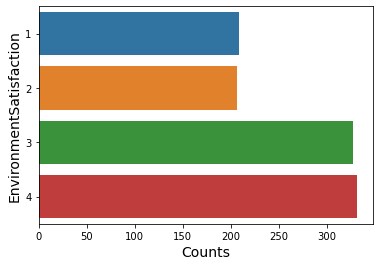

In [10046]:
#visualize this column by lineplot
sns.countplot(y = 'EnvironmentSatisfaction', data=df)
plt.ylabel('EnvironmentSatisfaction', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

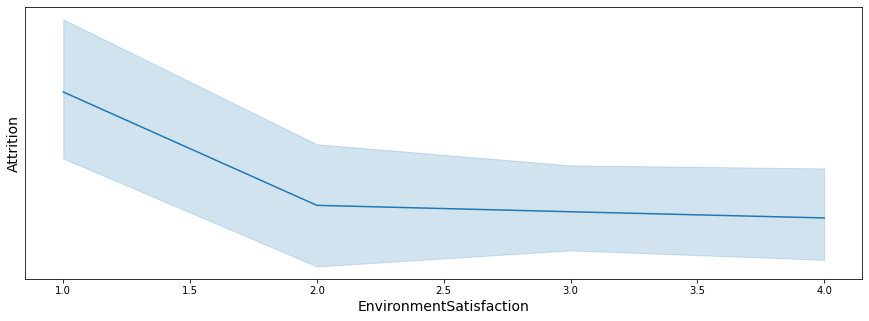

In [10047]:
#visualize this column by lineplot
plt.figure(figsize =(15,5))
sns.lineplot(x= 'EnvironmentSatisfaction', y = 'Attrition', data=df)
plt.xlabel('EnvironmentSatisfaction', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10048]:
df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts()
#check the relationship between column and label

EnvironmentSatisfaction  Attrition
1                        No           163
                         Yes           46
2                        No           180
                         Yes           27
3                        No           286
                         Yes           41
4                        No           292
                         Yes           40
Name: Attrition, dtype: int64

In [10049]:
df['EnvironmentSatisfaction'].skew() #check the skewness

-0.3284249695211698

Observation:
1. No Null values and no zero values are found
2. 4 rating is high as compared to other ratings
3. as, we can see that in our lineplot, attrition of 1 rating is high than others
4. skewness is good

In [10050]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 33)


# Column11: Gender

In [10051]:
df['Gender'].unique() #check the unique value

array(['Female', 'Male'], dtype=object)

In [10052]:
df['Gender'].value_counts() #check the number of counts for particular value

Male      645
Female    430
Name: Gender, dtype: int64

Text(0.5, 0, 'Counts')

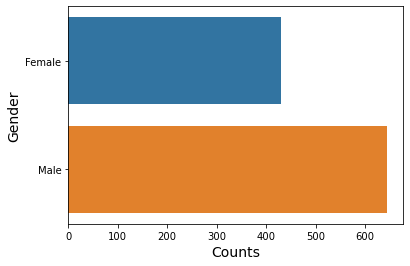

In [10053]:
#visualize this column by lineplot
sns.countplot(y = 'Gender', data=df)
plt.ylabel('Gender', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

In [10054]:
df.groupby('Gender')['Attrition'].value_counts()
#check the relationship between column and label

Gender  Attrition
Female  No           375
        Yes           55
Male    No           546
        Yes           99
Name: Attrition, dtype: int64

Text(0, 0.5, 'Attrition')

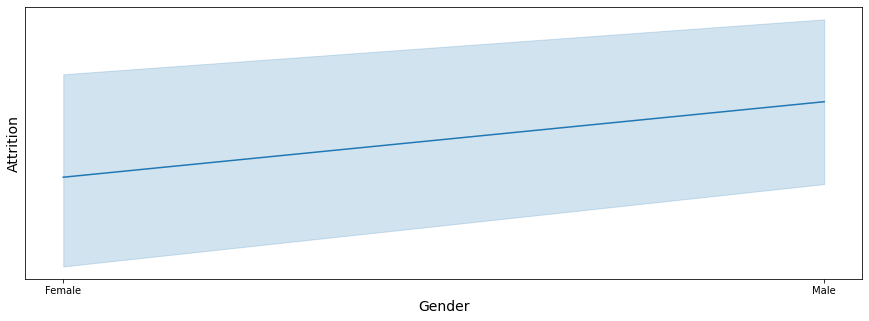

In [10055]:
#visualize this column by lineplot
plt.figure(figsize =(15,5))
sns.lineplot(x= 'Gender', y = 'Attrition', data=df)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10056]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1}) #change str into int

In [10057]:
df['Gender'].unique() #check the unique values now

array([1, 0], dtype=int64)

In [10058]:
df['Gender'].isnull().sum() #check for null

0

In [10059]:
df['Gender'].value_counts() #check the number of counts for particular value

0    645
1    430
Name: Gender, dtype: int64

Observation:
1. no null values found
2. Attrition in males are more than females in terms of percentage

In [10060]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 33)


# Column12: HourlyRate

In [10061]:
df['HourlyRate'].unique() #check the unique values

array([ 94,  61,  92,  56,  40,  79,  81,  80,  78,  45,  96,  82,  53,
        83,  58,  48,  42,  41,  72,  86,  97,  75,  33,  37,  49,  98,
        36,  50,  51,  43,  59,  95,  57,  76,  87,  66,  55,  32,  52,
        30,  70,  62,  99,  64,  63,  60,  71, 100,  73,  46,  39,  77,
        84,  47,  35,  91,  34,  67,  90,  65,  88,  85,  89,  68,  44,
        54,  69,  74,  31,  93,  38], dtype=int64)

In [10062]:
df['HourlyRate'].value_counts() #check the number of counts for particular value

42    24
98    22
48    22
57    21
87    21
      ..
50     9
58     9
68     9
34     9
71     8
Name: HourlyRate, Length: 71, dtype: int64

Text(0, 0.5, 'Counts')

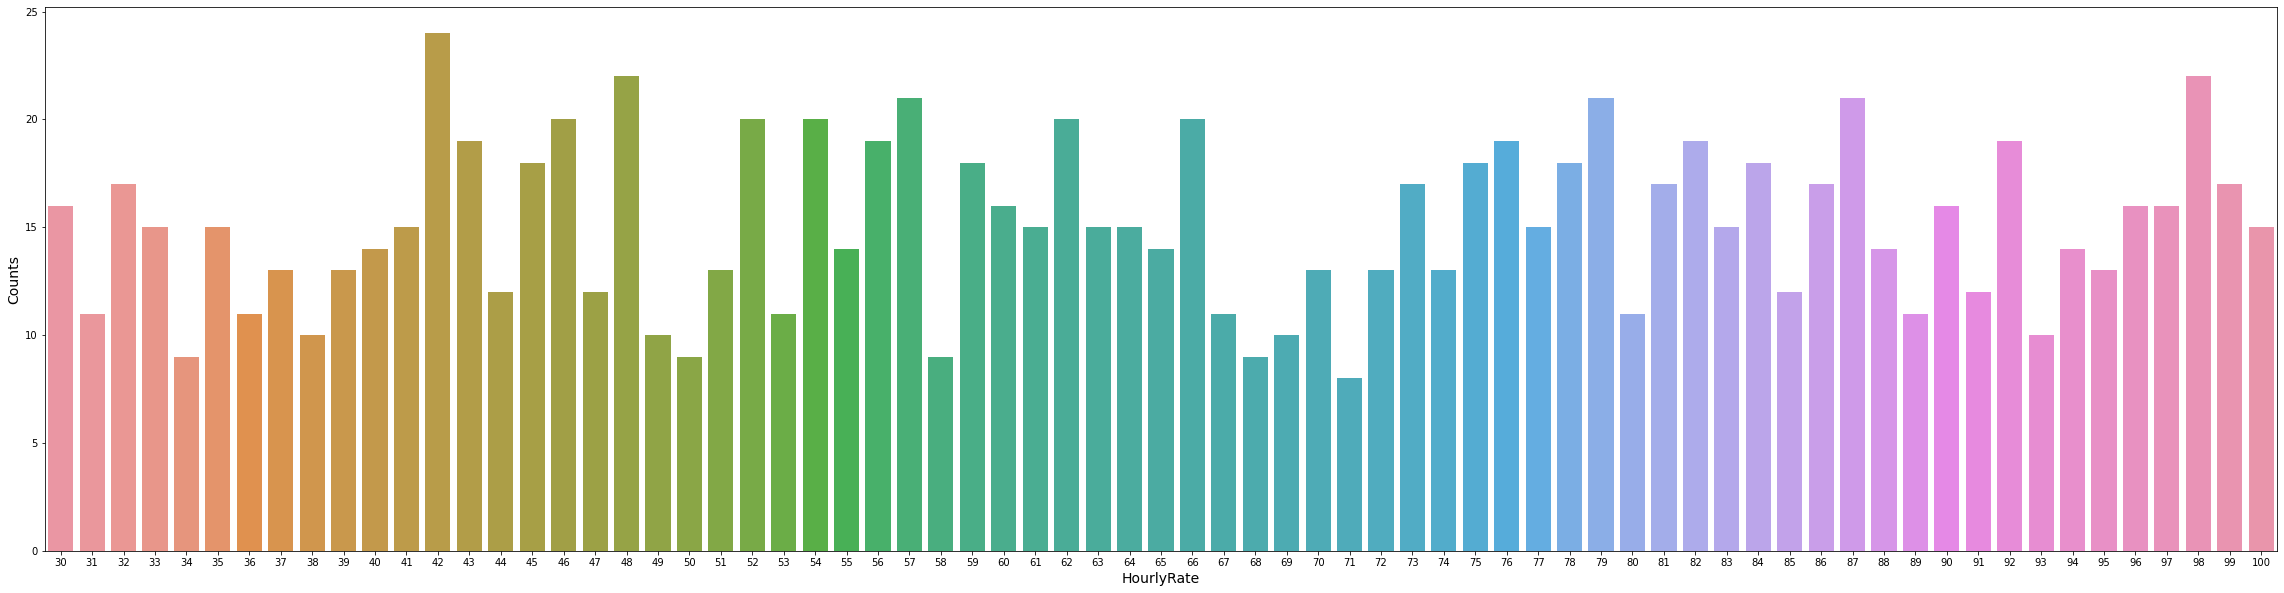

In [10063]:
#visualize this column by lineplot
plt.figure(figsize =(40,10))
sns.countplot(x = 'HourlyRate', data=df)
plt.xlabel('HourlyRate', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [10064]:
df['HourlyRate'].skew() #check the skewness

-0.008421813797230615

In [10065]:
df['HourlyRate'].describe()

count    1075.000000
mean       65.536744
std        20.414405
min        30.000000
25%        48.000000
50%        65.000000
75%        83.000000
max       100.000000
Name: HourlyRate, dtype: float64

Text(0, 0.5, 'Attrition')

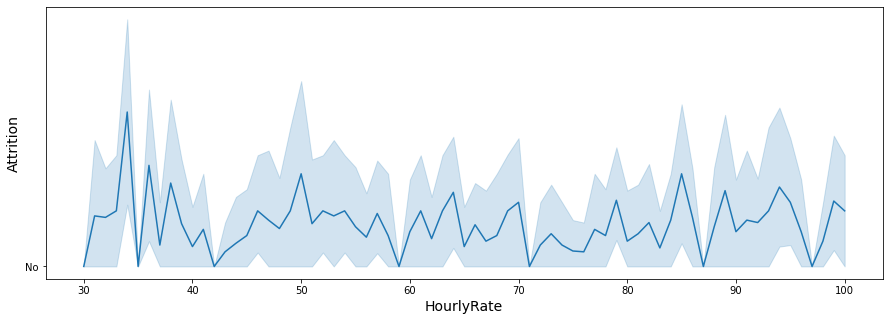

In [10066]:
#visualize this column by lineplot
plt.figure(figsize =(15,5))
sns.lineplot(x= 'HourlyRate', y = 'Attrition', data=df)
plt.xlabel('HourlyRate', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

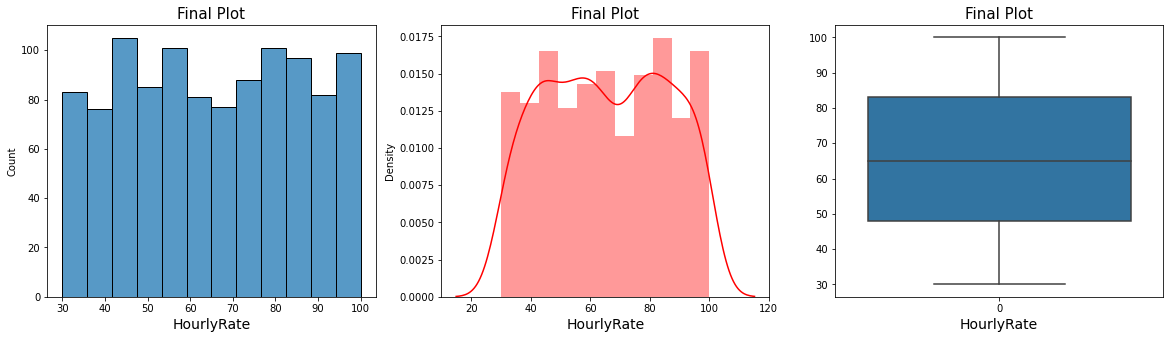

In [10067]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['HourlyRate']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('HourlyRate', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['HourlyRate'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('HourlyRate', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['HourlyRate']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('HourlyRate', fontsize= 14)
plt.show()

In [10068]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['HourlyRate'].mean())
print('Median of the column:----->',df['HourlyRate'].median())
print('Mode of the column:----->',st.mode(df['HourlyRate']))
print('std of the column:----->',df['HourlyRate'].std())

Mean of the column:-----> 65.5367441860465
Median of the column:-----> 65.0
Mode of the column:-----> 42
std of the column:-----> 20.4144054599604


Observation:
1. less skewnes 
2. no outliers are found
3. values of mean, median and mode are good
4. the attrition in Hourlyrates of 30-35 range is higher as compared to others. 

In [10069]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 33)


# Column13: JobInvolvement

In [10070]:
df['JobInvolvement'].unique() #check the unique values

array([3, 2, 4, 1], dtype=int64)

In [10071]:
df['JobInvolvement'].value_counts() #check the number of counts for particular value

3    634
2    283
4    102
1     56
Name: JobInvolvement, dtype: int64

Text(0.5, 0, 'Counts')

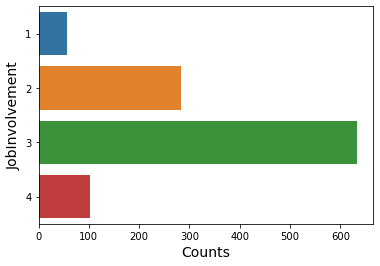

In [10072]:
#visualize this column by lineplot
sns.countplot(y = 'JobInvolvement', data=df)
plt.ylabel('JobInvolvement', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

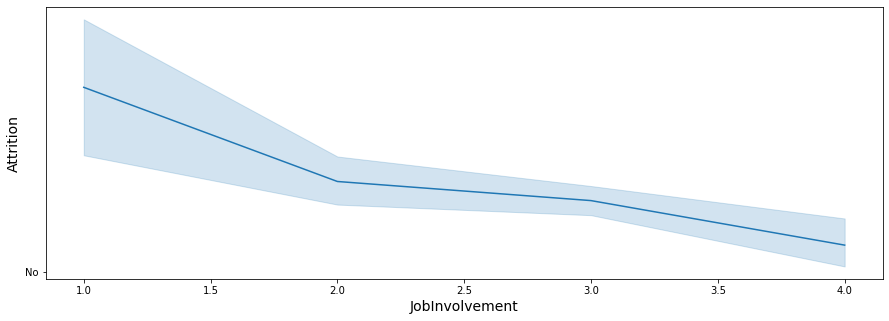

In [10073]:
#visualize this column by lineplot
plt.figure(figsize =(15,5))
sns.lineplot(x= 'JobInvolvement', y = 'Attrition', data=df)
plt.xlabel('JobInvolvement', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10074]:
df.groupby('JobInvolvement')['Attrition'].value_counts()
#check the relationship between feature and label

JobInvolvement  Attrition
1               No            37
                Yes           19
2               No           236
                Yes           47
3               No           551
                Yes           83
4               No            97
                Yes            5
Name: Attrition, dtype: int64

Observation:
1. peoples who have 3 ratings in jobInvolment are high
2. But peoples who have 1 rating have high Attrition

In [10075]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 33)


# column14: JobLevel

In [10076]:
df['JobLevel'].unique() #check the unique value

array([2, 1, 4, 3, 5], dtype=int64)

In [10077]:
df['JobLevel'].value_counts() #check the number of counts for particular value

1    409
2    378
3    157
4     70
5     61
Name: JobLevel, dtype: int64

Text(0.5, 0, 'Counts')

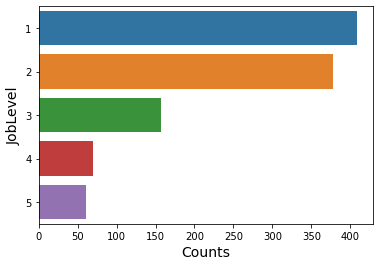

In [10078]:
#visualize this column by lineplot
sns.countplot(y = 'JobLevel', data=df)
plt.ylabel('JobLevel', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

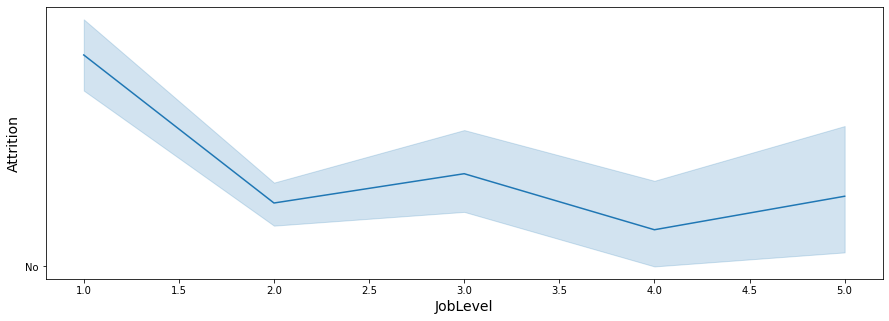

In [10079]:
#visualize this column by lineplot
plt.figure(figsize =(15,5))
sns.lineplot(x= 'JobLevel', y = 'Attrition', data=df)
plt.xlabel('JobLevel', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10080]:
df.groupby('JobLevel')['Attrition'].value_counts()
#check the relationship between feature and label

JobLevel  Attrition
1         No           308
          Yes          101
2         No           350
          Yes           28
3         No           140
          Yes           17
4         No            67
          Yes            3
5         No            56
          Yes            5
Name: Attrition, dtype: int64

Observation:
1. people who have less job level are more 
2. and their attrition rates are also high as compare to others.

In [10081]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 33)


# Column15: JobRole

In [10082]:
df['JobRole'].unique() #check the unique value

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Sales Representative',
       'Research Director', 'Healthcare Representative',
       'Human Resources'], dtype=object)

In [10083]:
df['JobRole'].value_counts() #check the number of counts for particular value

Sales Executive              233
Research Scientist           213
Laboratory Technician        188
Manufacturing Director       104
Healthcare Representative     91
Manager                       81
Sales Representative          65
Research Director             61
Human Resources               39
Name: JobRole, dtype: int64

Text(0.5, 0, 'Counts')

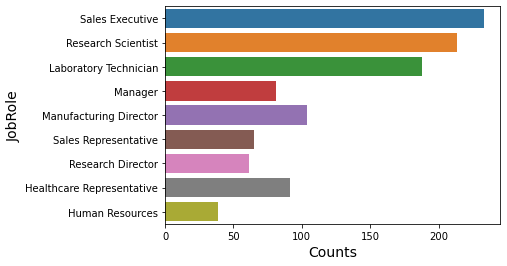

In [10084]:
#visualize this column by lineplot
sns.countplot(y = 'JobRole', data=df)
plt.ylabel('JobRole', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

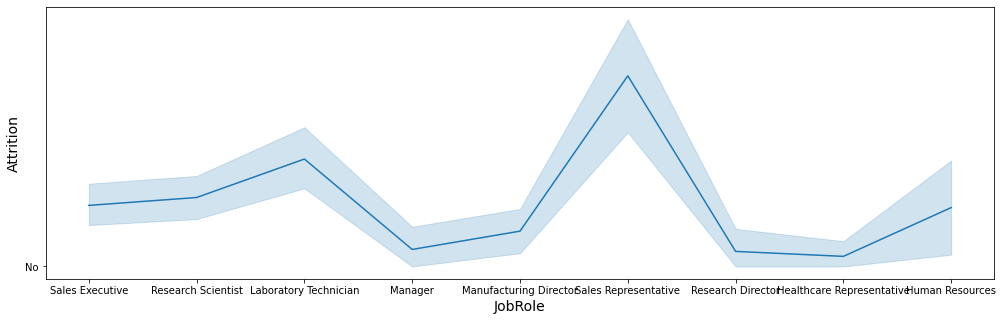

In [10085]:
#visualize this column by lineplot
plt.figure(figsize =(17,5))
sns.lineplot(x= 'JobRole', y = 'Attrition', data=df)
plt.xlabel('JobRole', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10086]:
df.groupby('JobRole')['Attrition'].value_counts()
#check the relationship between feature and label

JobRole                    Attrition
Healthcare Representative  No            89
                           Yes            2
Human Resources            No            34
                           Yes            5
Laboratory Technician      No           144
                           Yes           44
Manager                    No            78
                           Yes            3
Manufacturing Director     No            96
                           Yes            8
Research Director          No            59
                           Yes            2
Research Scientist         No           181
                           Yes           32
Sales Executive            No           202
                           Yes           31
Sales Representative       No            38
                           Yes           27
Name: Attrition, dtype: int64

In [10087]:
df['JobRole']= df['JobRole'].map({'Healthcare Representative':0, 'Human Resources':1,'Laboratory Technician':2,'Manager':3,'Manufacturing Director':4,'Research Director':5,'Research Scientist':6,'Sales Executive':7,'Sales Executive':8,'Sales Representative':9,'Sales Representative':10})

In [10088]:
df['JobRole'].unique() #now check the unique value

array([ 8,  6,  2,  3,  4, 10,  5,  0,  1], dtype=int64)

In [10089]:
df['JobRole'].value_counts() #check the number of counts for particular value

8     233
6     213
2     188
4     104
0      91
3      81
10     65
5      61
1      39
Name: JobRole, dtype: int64

Observation:
1. sales executives are high
2. but, attrition in sales executives are high

In [10090]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 33)


# Column16: JobSatisfaction

In [10091]:
df['JobSatisfaction'].unique() #check the unique value

array([4, 2, 3, 1], dtype=int64)

In [10092]:
df['JobSatisfaction'].value_counts() #check the number of counts for particular value

4    340
3    320
1    209
2    206
Name: JobSatisfaction, dtype: int64

In [10093]:
df['JobSatisfaction'].all() #check the zero value

True

In [10094]:
df['JobSatisfaction'].isnull().sum() #check for null

0

Text(0.5, 0, 'Counts')

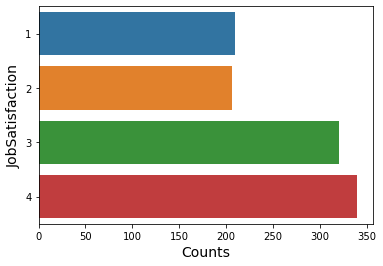

In [10095]:
#visualize this column by lineplot
sns.countplot(y = 'JobSatisfaction', data=df)
plt.ylabel('JobSatisfaction', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

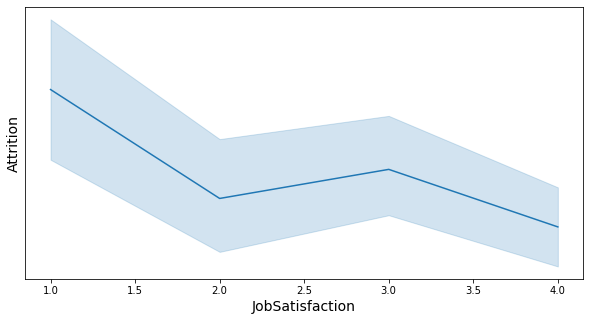

In [10096]:
#visualize this column by lineplot
plt.figure(figsize =(10,5))
sns.lineplot(x= 'JobSatisfaction', y = 'Attrition', data=df)
plt.xlabel('JobSatisfaction', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10097]:
df.groupby('JobSatisfaction')['Attrition'].value_counts()
#check the relationship between feature and label

JobSatisfaction  Attrition
1                No           164
                 Yes           45
2                No           180
                 Yes           26
3                No           272
                 Yes           48
4                No           305
                 Yes           35
Name: Attrition, dtype: int64

Observation:
1. people who have job satisfaction 4 are high
2. but Attrition is high who have less job satisfaction that is 1

In [10098]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 33)


# Column17: MaritalStatus

In [10099]:
df['MaritalStatus'].unique() #check for unique value

array(['Single', 'Married', 'Divorced'], dtype=object)

In [10100]:
df['MaritalStatus'].value_counts() #check the number of counts for particular value

Married     481
Single      354
Divorced    240
Name: MaritalStatus, dtype: int64

Text(0.5, 0, 'Counts')

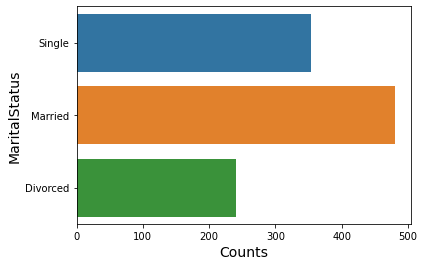

In [10101]:
#visualize this column by lineplot
sns.countplot(y = 'MaritalStatus', data=df)
plt.ylabel('MaritalStatus', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

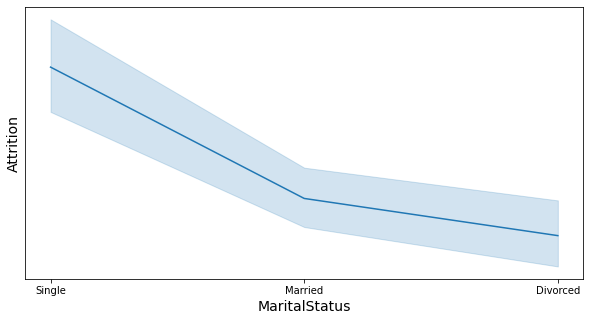

In [10102]:
#visualize this column by lineplot
plt.figure(figsize =(10,5))
sns.lineplot(x= 'MaritalStatus', y = 'Attrition', data=df)
plt.xlabel('MaritalStatus', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10103]:
df.groupby('MaritalStatus')['Attrition'].value_counts() 
#check the relationship between feature and label

MaritalStatus  Attrition
Divorced       No           222
               Yes           18
Married        No           428
               Yes           53
Single         No           271
               Yes           83
Name: Attrition, dtype: int64

In [10104]:
df['MaritalStatus'] = df['MaritalStatus'].map({'Divorced':1, 'Married':2,'Single':3})

In [10105]:
df['MaritalStatus'].unique() #now check the unique value

array([3, 2, 1], dtype=int64)

In [10106]:
df['MaritalStatus'].value_counts() #check the number of counts for particular value

2    481
3    354
1    240
Name: MaritalStatus, dtype: int64

Observation:
1. Attrition in single peoples are high but married peoples are high in quantity

In [10107]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1075, 33)


# Column18: MonthlyIncome

In [10108]:
df['MonthlyIncome'].unique() #check the unique value

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

In [10109]:
df['MonthlyIncome'].value_counts() #check the number of counts for particular value

2342     4
2404     3
6142     3
6347     3
2380     3
        ..
4084     1
4728     1
2683     1
6553     1
10239    1
Name: MonthlyIncome, Length: 1013, dtype: int64

In [10110]:
df['MonthlyIncome'].all() #check for zero value

True

In [10111]:
df['MonthlyIncome'].isnull().sum() #check for null

0

In [10112]:
df['MonthlyIncome'].skew() #check the skewness

1.3697438438890641

In [10113]:
df.groupby('MonthlyIncome')['Attrition'].value_counts()
#check the relationship between feature and label

MonthlyIncome  Attrition
1009           Yes          1
1051           No           1
1052           No           1
1081           Yes          1
1102           Yes          1
                           ..
19859          Yes          1
19926          No           1
19943          No           1
19973          No           1
19999          No           1
Name: Attrition, Length: 1027, dtype: int64

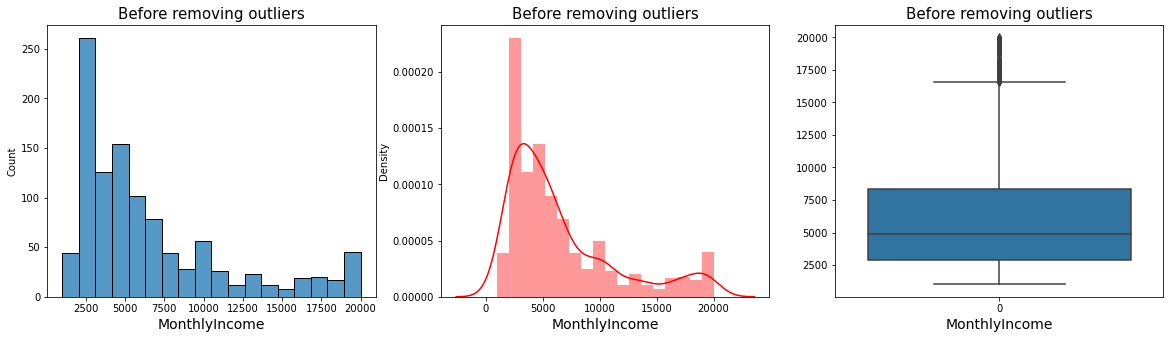

In [10114]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['MonthlyIncome']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('MonthlyIncome', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['MonthlyIncome'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('MonthlyIncome', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['MonthlyIncome']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('MonthlyIncome', fontsize= 14)
plt.show()

In [10115]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['MonthlyIncome'].mean())
print('Median of the column:----->',df['MonthlyIncome'].median())
print('Mode of the column:----->',st.mode(df['MonthlyIncome']))
print('std of the column:----->',df['MonthlyIncome'].std())

Mean of the column:-----> 6557.706046511628
Median of the column:-----> 4907.0
Mode of the column:-----> 2342
std of the column:-----> 4834.349673960471


In [10116]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['MonthlyIncome'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['MonthlyIncome'], 50,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['MonthlyIncome'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['MonthlyIncome'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 2003.0

 **************************************************
Higher range:-
 (array([   8,   12,   14,   16,   17,   30,   32,   38,   39,   43,   44,
         45,   47,   57,   58,   62,   69,   70,   72,   74,   77,   83,
         84,   91,   92,   94,   98,   99,  101,  109,  115,  119,  123,
        124,  125,  134,  138,  139,  140,  141,  144,  151,  152,  153,
        154,  156,  158,  162,  163,  167,  168,  170,  172,  174,  178,
        179,  184,  185,  188,  193,  198,  202,  205,  206,  212,  219,
        222,  229,  230,  232,  240,  241,  244,  247,  256,  257,  268,
        275,  276,  282,  284,  294,  296,  302,  303,  305,  307,  309,
        311,  315,  317,  321,  324,  325,  329,  334,  338,  339,  344,
        345,  348,  350,  356,  359,  362,  365,  370,  373,  377,  386,
        389,  396,  397,  398,  399,  400,  401,  404,  406,  411,  419,
        424,  437,  441,  443,  444,  446,  456,  457,  467,  468,  476,
        486,  489,

In [10117]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1075, 33)
New Shape:------>  (793, 33)


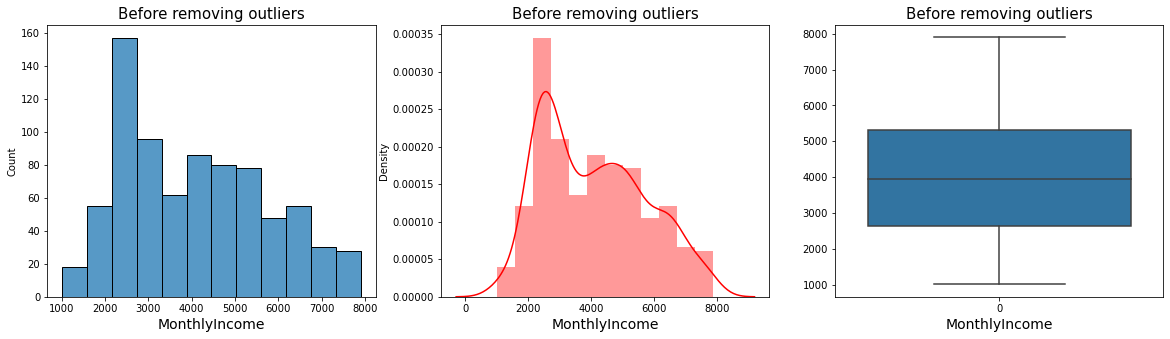

In [10118]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['MonthlyIncome']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('MonthlyIncome', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['MonthlyIncome'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('MonthlyIncome', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['MonthlyIncome']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('MonthlyIncome', fontsize= 14)
plt.show()

In [10119]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['MonthlyIncome'].mean())
print('Median of the column:----->',df['MonthlyIncome'].median())
print('Mode of the column:----->',st.mode(df['MonthlyIncome']))
print('std of the column:----->',df['MonthlyIncome'].std())

Mean of the column:-----> 4084.2257250945777
Median of the column:-----> 3944.0
Mode of the column:-----> 2342
std of the column:-----> 1655.0118055497674


In [10120]:
df['MonthlyIncome'] = df['MonthlyIncome'].replace(2342, df['MonthlyIncome'].mean())

In [10121]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['MonthlyIncome'].mean())
print('Median of the column:----->',df['MonthlyIncome'].median())
print('Mode of the column:----->',st.mode(df['MonthlyIncome']))
print('std of the column:----->',df['MonthlyIncome'].std())

Mean of the column:-----> 4093.013748928598
Median of the column:-----> 3977.0
Mode of the column:-----> 4084.2257250945777
std of the column:-----> 1650.3504769349188


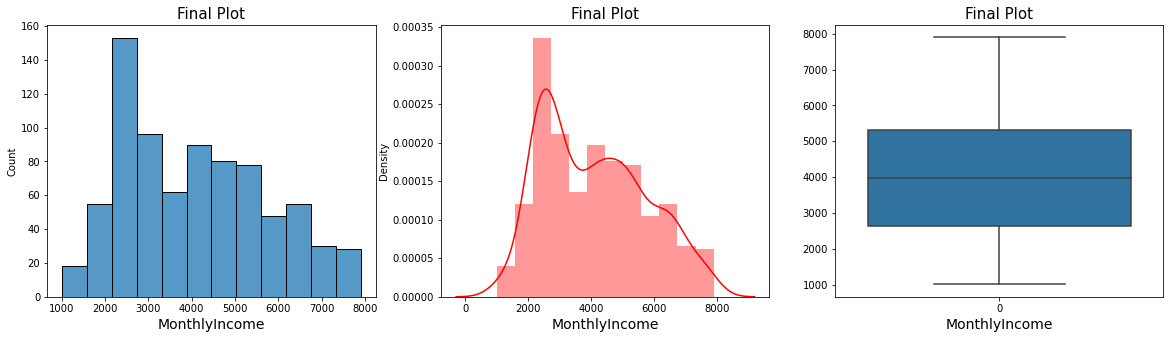

In [10122]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['MonthlyIncome']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('MonthlyIncome', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['MonthlyIncome'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('MonthlyIncome', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['MonthlyIncome']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('MonthlyIncome', fontsize= 14)
plt.show()

In [10123]:
df['MonthlyIncome'].skew()

0.3926733955198678

Observation:
1. No zero and no null values are found
2. improve skewness from 1.36 to 0.39
3. remove outliers
4. improve mean, median and mode value

In [10124]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (793, 33)


# Columns19: MonthlyRate

In [10125]:
df['MonthlyRate'].unique() #check the unique value

array([19479, 24907,  2396, 23159, 16632, 11864,  9964, 15053,  4306,
        8232,  6986, 17102, 21173,  6670, 19121, 16117,  3335,  3020,
       21923,  3810,  9687, 13072,  3193, 10910, 19715, 10781, 20445,
        4892, 19294, 11179,  4009,  9528,  2689, 10877, 22656,  5868,
       21777, 24668,  4956, 18775,  7346, 22002, 20682, 23016, 10425,
       15998, 26278, 15717, 17736, 21698,  9518, 18725, 15830, 19760,
       24301, 17519,  8863, 23648, 15178, 19783, 12482, 15850, 26959,
       26897, 25796, 22887, 15000, 14506,  2561, 20739, 23300, 19299,
        2819, 14590, 13982, 10224,  2302, 22812, 10415, 11162,  6961,
       16102, 11439, 16047, 10901, 26283, 13983, 11873, 11314,  5970,
       25326, 12430, 20989, 15062, 11012,  6319, 13939, 10515,  9241,
        6984,  3425, 11781,  5228, 15986,  7259,  9679,  5972, 12392,
       14242,  8556, 19757, 17011,  9945, 13248,  4381,  8456,  2539,
        3300, 25657, 21509, 20990,  9571, 15417, 14776, 23687, 18697,
        5118,  7505,

In [10126]:
df['MonthlyRate'].value_counts() #check the number of counts for particular value

4223     3
17001    2
10494    2
9150     2
3339     2
        ..
8544     1
3425     1
9571     1
15717    1
12287    1
Name: MonthlyRate, Length: 781, dtype: int64

In [10127]:
df['MonthlyRate'].all() #check for zero value

True

In [10128]:
df['MonthlyRate'].isnull().sum() #check for null value

0

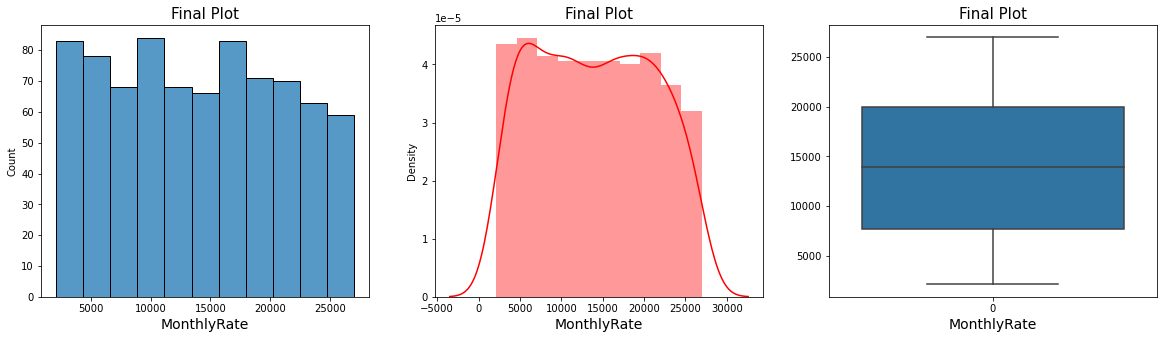

In [10129]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['MonthlyRate']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('MonthlyRate', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['MonthlyRate'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('MonthlyRate', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['MonthlyRate']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('MonthlyRate', fontsize= 14)
plt.show()

In [10130]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['MonthlyRate'].mean())
print('Median of the column:----->',df['MonthlyRate'].median())
print('Mode of the column:----->',st.mode(df['MonthlyRate']))
print('std of the column:----->',df['MonthlyRate'].std())

Mean of the column:-----> 14011.607818411097
Median of the column:-----> 13939.0
Mode of the column:-----> 4223
std of the column:-----> 7070.912664778046


In [10131]:
df['MonthlyRate'] = df['MonthlyRate'].replace(4223, df['MonthlyRate'].mean())

In [10132]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['MonthlyRate'].mean())
print('Median of the column:----->',df['MonthlyRate'].median())
print('Mode of the column:----->',st.mode(df['MonthlyRate']))
print('std of the column:----->',df['MonthlyRate'].std())

Mean of the column:-----> 14048.639121633332
Median of the column:-----> 13983.0
Mode of the column:-----> 14011.607818411097
std of the column:-----> 7045.103993329821


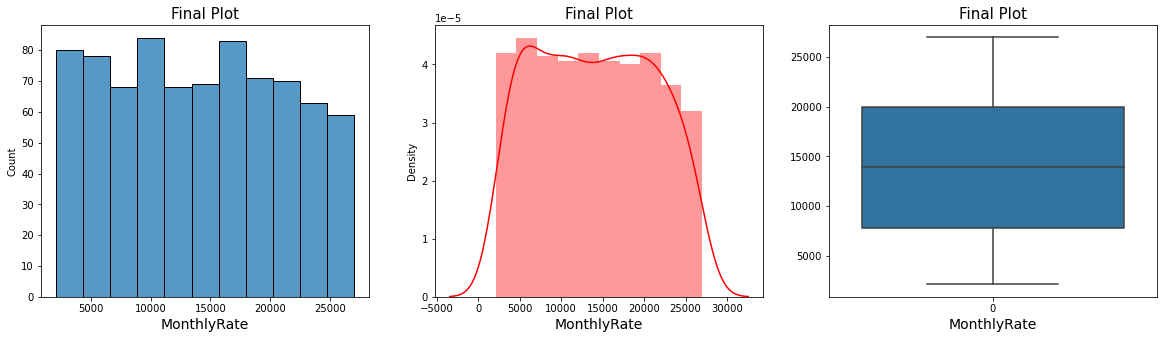

In [10133]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['MonthlyRate']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('MonthlyRate', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['MonthlyRate'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('MonthlyRate', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['MonthlyRate']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('MonthlyRate', fontsize= 14)
plt.show()

In [10134]:
df['MonthlyRate'].skew() #now, check the skewness

0.05957938823727397

Observation:
1. improve skewness
2. no zero and null values found
3. no outliers found
4. improve mean, median and mode value

In [10135]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (793, 33)


# Column20: NumCompaniesWorked

In [10136]:
df['NumCompaniesWorked'].unique() #check for unique value

array([8, 1, 6, 9, 0, 4, 5, 7, 2, 3], dtype=int64)

In [10137]:
df['NumCompaniesWorked'].value_counts() #check the number of counts for particular value

1    309
0    116
3     71
4     71
2     68
6     40
7     36
5     32
9     26
8     24
Name: NumCompaniesWorked, dtype: int64

In [10138]:
df['NumCompaniesWorked'].isnull().sum()

0

In [10139]:
df['NumCompaniesWorked'].skew()

1.1107655677297625

Text(0.5, 0, 'Counts')

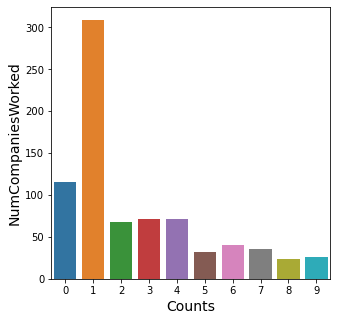

In [10140]:
#visualize this column by lineplot
plt.figure(figsize =(5,5))
sns.countplot(x = 'NumCompaniesWorked', data=df)
plt.ylabel('NumCompaniesWorked', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

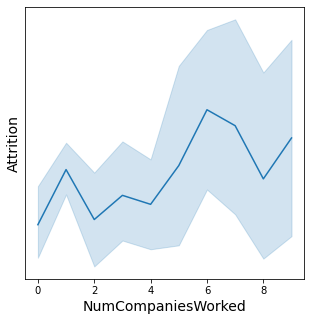

In [10141]:
#visualize this column by lineplot
plt.figure(figsize =(5,5))
sns.lineplot(x= 'NumCompaniesWorked', y = 'Attrition', data=df)
plt.xlabel('NumCompaniesWorked', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10142]:
df.groupby('NumCompaniesWorked')['Attrition'].value_counts()

NumCompaniesWorked  Attrition
0                   No           105
                    Yes           11
1                   No           253
                    Yes           56
2                   No            61
                    Yes            7
3                   No            61
                    Yes           10
4                   No            62
                    Yes            9
5                   No            26
                    Yes            6
6                   No            29
                    Yes           11
7                   No            27
                    Yes            9
8                   No            20
                    Yes            4
9                   No            20
                    Yes            6
Name: Attrition, dtype: int64

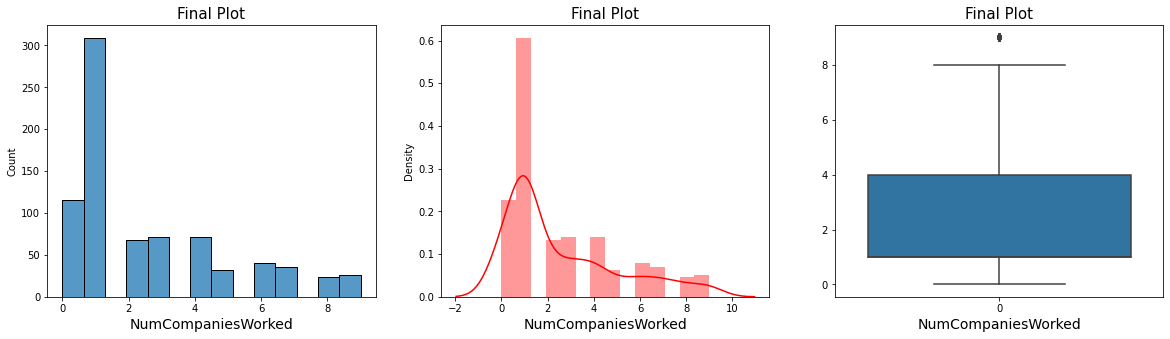

In [10143]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['NumCompaniesWorked']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('NumCompaniesWorked', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['NumCompaniesWorked'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('NumCompaniesWorked', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['NumCompaniesWorked']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('NumCompaniesWorked', fontsize= 14)
plt.show()

In [10144]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['NumCompaniesWorked'].mean())
print('Median of the column:----->',df['NumCompaniesWorked'].median())
print('Mode of the column:----->',st.mode(df['NumCompaniesWorked']))
print('std of the column:----->',df['NumCompaniesWorked'].std())

Mean of the column:-----> 2.5472887767969734
Median of the column:-----> 1.0
Mode of the column:-----> 1
std of the column:-----> 2.4762703787091525


In [10145]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['NumCompaniesWorked'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['NumCompaniesWorked'], 72,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['NumCompaniesWorked'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['NumCompaniesWorked'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 3.0

 **************************************************
Higher range:-
 (array([  4,  21,  28, 105, 109, 174, 200, 209, 214, 238, 279, 291, 321,
       333, 337, 361, 423, 440, 499, 535, 555, 599, 612, 628, 656, 780],
      dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [10146]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (793, 33)
New Shape:------>  (767, 33)


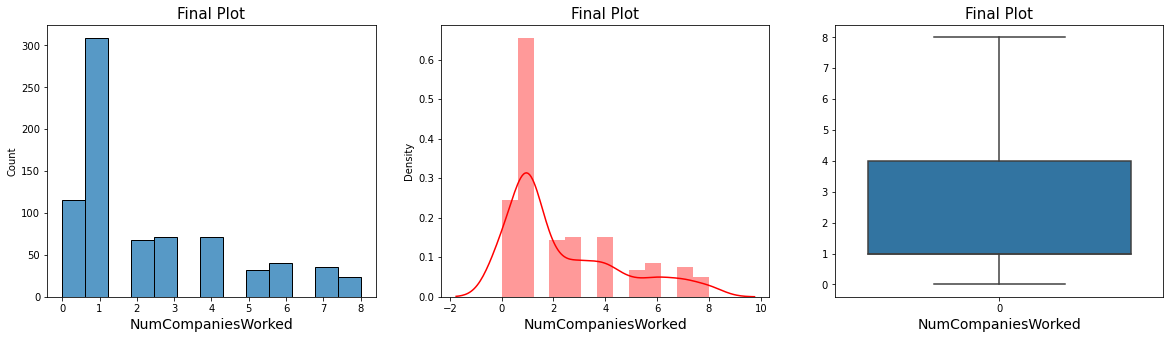

In [10147]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['NumCompaniesWorked']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('NumCompaniesWorked', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['NumCompaniesWorked'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('NumCompaniesWorked', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['NumCompaniesWorked']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('NumCompaniesWorked', fontsize= 14)
plt.show()

In [10148]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['NumCompaniesWorked'].mean())
print('Median of the column:----->',df['NumCompaniesWorked'].median())
print('Mode of the column:----->',st.mode(df['NumCompaniesWorked']))
print('std of the column:----->',df['NumCompaniesWorked'].std())

Mean of the column:-----> 2.3285528031290745
Median of the column:-----> 1.0
Mode of the column:-----> 1
std of the column:-----> 2.208813550837834


In [10149]:
df['NumCompaniesWorked'].skew() #now, check the skewness

1.068736611999596

Observation:
1. Attrition rate is higher when people changes more companies
2. improve skewness
3. remove outliers

In [10150]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (767, 33)


# Column21: Over18

In [10151]:
df['Over18'].unique() #check for unique values

array(['Y'], dtype=object)

In [10152]:
df['Over18'].value_counts() #check the number of counts for particular value

Y    767
Name: Over18, dtype: int64

In [10153]:
df.drop(columns = ['Over18'], inplace=True)

Observation:
1. same value in this column

In [10154]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (767, 32)


# Column22: OverTime

In [10155]:
df['OverTime'].unique() #check for unique values

array(['Yes', 'No'], dtype=object)

In [10156]:
df['OverTime'].value_counts() #check the number of counts for particular value

No     557
Yes    210
Name: OverTime, dtype: int64

In [10157]:
df['OverTime'].isnull().sum() #check for null

0

Text(0.5, 0, 'Counts')

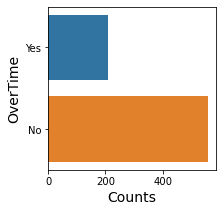

In [10158]:
#visualize this column by lineplot
plt.figure(figsize =(3,3))
sns.countplot(y = 'OverTime', data=df)
plt.ylabel('OverTime', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

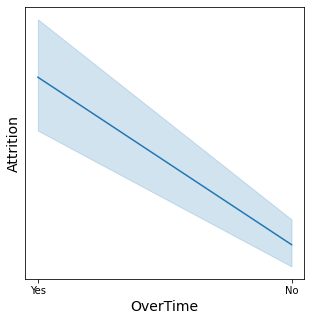

In [10159]:
#visualize this column by lineplot
plt.figure(figsize =(5,5))
sns.lineplot(x= 'OverTime', y = 'Attrition', data=df)
plt.xlabel('OverTime', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10160]:
df.groupby('OverTime')['Attrition'].value_counts()

OverTime  Attrition
No        No           495
          Yes           62
Yes       No           149
          Yes           61
Name: Attrition, dtype: int64

In [10161]:
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0}) #change column into int

In [10162]:
df['OverTime'].unique() #check for unique values

array([1, 0], dtype=int64)

In [10163]:
df['OverTime'].value_counts() #check the number of counts for particular value

0    557
1    210
Name: OverTime, dtype: int64

Observation:
1. people who have no overtime are more 
2. but people who have overtime their attrition rate is high

In [10164]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (767, 32)


# Column23: PercentSalaryHike

In [10165]:
df['PercentSalaryHike'].unique() #check for unique values

array([11, 23, 15, 13, 20, 12, 18, 14, 16, 19, 21, 22, 17, 24, 25],
      dtype=int64)

In [10166]:
df['PercentSalaryHike'].value_counts() #check the number of counts for particular value

13    119
11    107
12    103
14    103
15     46
17     46
18     44
19     41
20     36
16     35
22     31
21     26
23     14
24      9
25      7
Name: PercentSalaryHike, dtype: int64

In [10167]:
df['PercentSalaryHike'].all() #check for zero

True

In [10168]:
df['PercentSalaryHike'].isnull().sum() #check for null

0

In [10169]:
df['PercentSalaryHike'].skew() #check for skewness

0.7783261119172499

Text(0.5, 0, 'Counts')

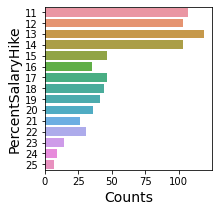

In [10170]:
#visualize this column by lineplot
plt.figure(figsize =(3,3))
sns.countplot(y = 'PercentSalaryHike', data=df)
plt.ylabel('PercentSalaryHike', fontsize = 14)
plt.xlabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

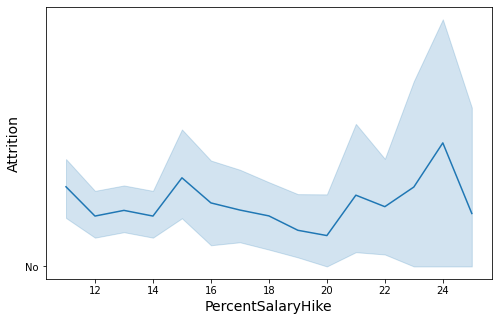

In [10171]:
#visualize this column by lineplot
plt.figure(figsize =(8,5))
sns.lineplot(x= 'PercentSalaryHike', y = 'Attrition', data=df)
plt.xlabel('PercentSalaryHike', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10172]:
df.groupby('PercentSalaryHike')['Attrition'].value_counts()

PercentSalaryHike  Attrition
11                 No            84
                   Yes           23
12                 No            89
                   Yes           14
13                 No           101
                   Yes           18
14                 No            89
                   Yes           14
15                 No            35
                   Yes           11
16                 No            29
                   Yes            6
17                 No            39
                   Yes            7
18                 No            38
                   Yes            6
19                 No            37
                   Yes            4
20                 No            33
                   Yes            3
21                 No            21
                   Yes            5
22                 No            26
                   Yes            5
23                 No            11
                   Yes            3
24                 No             6

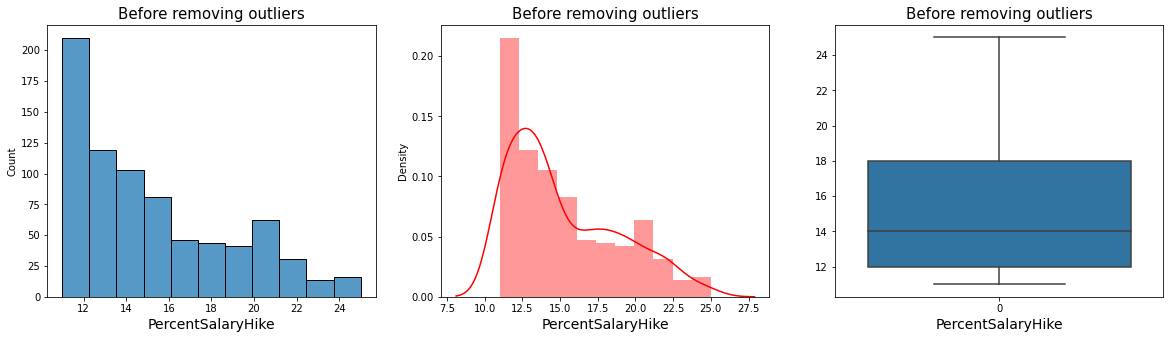

In [10173]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['PercentSalaryHike']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('PercentSalaryHike', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['PercentSalaryHike'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('PercentSalaryHike', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['PercentSalaryHike']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('PercentSalaryHike', fontsize= 14)
plt.show()

In [10174]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['PercentSalaryHike'].mean())
print('Median of the column:----->',df['PercentSalaryHike'].median())
print('Mode of the column:----->',st.mode(df['PercentSalaryHike']))
print('std of the column:----->',df['PercentSalaryHike'].std())

Mean of the column:-----> 15.209908735332464
Median of the column:-----> 14.0
Mode of the column:-----> 13
std of the column:-----> 3.6374905800729436


In [10175]:
df['PercentSalaryHike'] = df['PercentSalaryHike'].replace(13, df['PercentSalaryHike'].mean())

In [10176]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['PercentSalaryHike'].mean())
print('Median of the column:----->',df['PercentSalaryHike'].median())
print('Mode of the column:----->',st.mode(df['PercentSalaryHike']))
print('std of the column:----->',df['PercentSalaryHike'].std())

Mean of the column:-----> 15.552775931557472
Median of the column:-----> 15.209908735332464
Mode of the column:-----> 15.209908735332464
std of the column:-----> 3.514958314506551


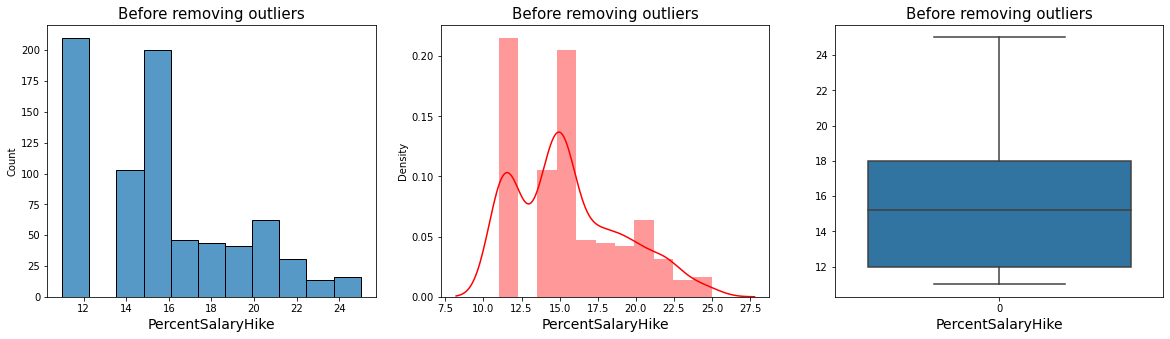

In [10177]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['PercentSalaryHike']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('PercentSalaryHike', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['PercentSalaryHike'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('PercentSalaryHike', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['PercentSalaryHike']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('PercentSalaryHike', fontsize= 14)
plt.show()

In [10178]:
df['PercentSalaryHike'].skew()

0.606971407497561

In [10179]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['PercentSalaryHike'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['PercentSalaryHike'], 65,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['PercentSalaryHike'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['PercentSalaryHike'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 4.0

 **************************************************
Higher range:-
 (array([  1,   9,  23,  28,  30,  35,  39,  41,  48,  54,  62,  65,  72,
        95,  97, 133, 136, 138, 169, 183, 188, 199, 205, 216, 242, 258,
       264, 290, 301, 311, 321, 325, 326, 340, 369, 375, 399, 406, 438,
       445, 465, 473, 500, 528, 533, 546, 556, 563, 612, 618, 653, 678,
       681, 682, 686, 695, 698, 712, 718, 742, 748], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [10180]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (767, 32)
New Shape:------>  (706, 32)


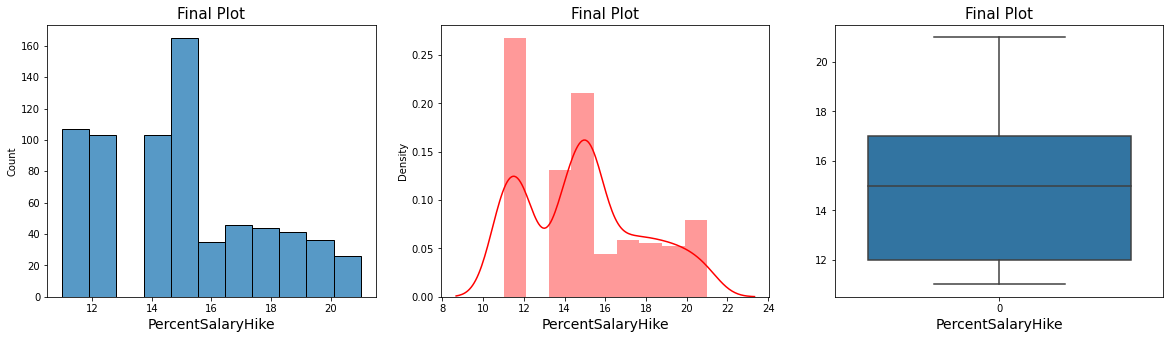

In [10181]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['PercentSalaryHike']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('PercentSalaryHike', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['PercentSalaryHike'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('PercentSalaryHike', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['PercentSalaryHike']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('PercentSalaryHike', fontsize= 14)
plt.show()

In [10182]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['PercentSalaryHike'].mean())
print('Median of the column:----->',df['PercentSalaryHike'].median())
print('Mode of the column:----->',st.mode(df['PercentSalaryHike']))
print('std of the column:----->',df['PercentSalaryHike'].std())

Mean of the column:-----> 14.920650339241616
Median of the column:-----> 15.0
Mode of the column:-----> 15.209908735332464
std of the column:-----> 2.8805530653223808


In [10183]:
df['PercentSalaryHike'].skew() #now, check the skewness

0.3566637491585619

Observation:
1. people who have high salary hike their attrition rate is high
2. improve skewness 0.77 to 0.35
3. improve mean,median and mode
4. remove outliers

In [10184]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (706, 32)


# Column24: PerformanceRating

In [10185]:
df['PerformanceRating'].unique() #check for unique values

array([3, 4], dtype=int64)

In [10186]:
df['PerformanceRating'].value_counts() #check the number of counts for particular value

3    644
4     62
Name: PerformanceRating, dtype: int64

In [10187]:
df['PerformanceRating'].all() #check for zero 

True

In [10188]:
df['PerformanceRating'].isnull().sum() #check for null

0

Text(0, 0.5, 'Counts')

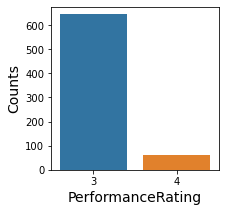

In [10189]:
#visualize this column by lineplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'PerformanceRating', data=df)
plt.xlabel('PerformanceRating', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

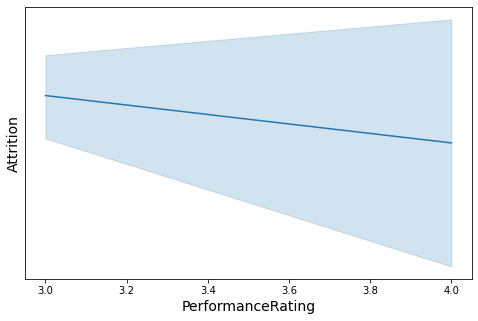

In [10190]:
#visualize this column by lineplot
plt.figure(figsize =(8,5))
sns.lineplot(x= 'PerformanceRating', y = 'Attrition', data=df)
plt.xlabel('PerformanceRating', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10191]:
df.groupby('PerformanceRating')['Attrition'].value_counts()

PerformanceRating  Attrition
3                  No           541
                   Yes          103
4                  No            54
                   Yes            8
Name: Attrition, dtype: int64

Observation:
1. those who have 3 rating their attrition rate is high

In [10192]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (706, 32)


# Column25: RelationshipSatisfaction

In [10193]:
df['RelationshipSatisfaction'].unique() #check for unique value

array([1, 2, 3, 4], dtype=int64)

In [10194]:
df['RelationshipSatisfaction'].value_counts() #check the number of counts for particular value

3    216
4    203
1    146
2    141
Name: RelationshipSatisfaction, dtype: int64

In [10195]:
df['RelationshipSatisfaction'].all() #check for zeros

True

In [10196]:
df['RelationshipSatisfaction'].isnull().sum() #check for null 

0

Text(0, 0.5, 'Counts')

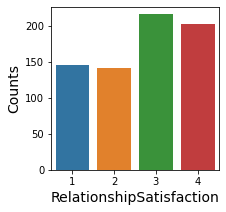

In [10197]:
#visualize this column by lineplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'RelationshipSatisfaction', data=df)
plt.xlabel('RelationshipSatisfaction', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

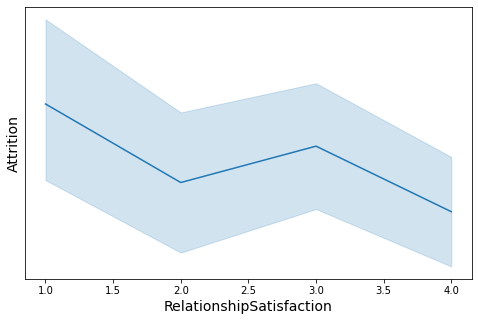

In [10198]:
#visualize this column by lineplot
plt.figure(figsize =(8,5))
sns.lineplot(x= 'RelationshipSatisfaction', y = 'Attrition', data=df)
plt.xlabel('RelationshipSatisfaction', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10199]:
df.groupby('RelationshipSatisfaction')['Attrition'].value_counts() #change into int

RelationshipSatisfaction  Attrition
1                         No           116
                          Yes           30
2                         No           121
                          Yes           20
3                         No           179
                          Yes           37
4                         No           179
                          Yes           24
Name: Attrition, dtype: int64

Observation:
1. those who have less relationshipsatisfaction their attrition rate is high

In [10200]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (706, 32)


# Column26: StandardHours

In [10201]:
df['StandardHours'].unique() #check for unique

array([80], dtype=int64)

In [10202]:
df['StandardHours'].value_counts() #check the number of counts for particular value

80    706
Name: StandardHours, dtype: int64

In [10203]:
df.drop(columns=['StandardHours'],inplace=True)

Observation:
1. same value in this column, so, it is better to drop this column

In [10204]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (706, 31)


# Column27: StockOptionLevel

In [10205]:
df['StockOptionLevel'].unique() #check for unique values

array([0, 3, 2, 1], dtype=int64)

In [10206]:
df['StockOptionLevel'].value_counts() #check the number of counts for particular value

0    331
1    264
2     68
3     43
Name: StockOptionLevel, dtype: int64

In [10207]:
df['StockOptionLevel'].isnull().sum() #check for null

0

Text(0, 0.5, 'Counts')

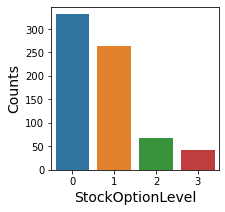

In [10208]:
#visualize this column by lineplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'StockOptionLevel', data=df)
plt.xlabel('StockOptionLevel', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

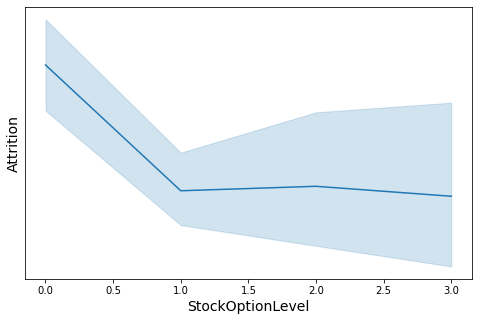

In [10209]:
#visualize this column by lineplot
plt.figure(figsize =(8,5))
sns.lineplot(x= 'StockOptionLevel', y = 'Attrition', data=df)
plt.xlabel('StockOptionLevel', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10210]:
df.groupby('StockOptionLevel')['Attrition'].value_counts() #change into int

StockOptionLevel  Attrition
0                 No           257
                  Yes           74
1                 No           238
                  Yes           26
2                 No            61
                  Yes            7
3                 No            39
                  Yes            4
Name: Attrition, dtype: int64

Observation:
1. maximum people don't have stock option level and their attrition rate is also high

In [10211]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (706, 31)


# Column28: TotalWorkingYears

In [10212]:
df['TotalWorkingYears'].unique() #check for unique

array([ 8,  7, 12,  6,  5, 10,  9, 19,  3,  2,  1, 14, 20, 16, 17, 37, 11,
        4, 23, 13,  0, 24, 15, 18, 29, 30], dtype=int64)

In [10213]:
df['TotalWorkingYears'].value_counts() #check the number of counts for particular value

10    102
6      77
8      64
5      61
1      54
7      53
4      43
9      37
3      31
12     26
2      23
13     20
11     16
14     16
15     16
19     13
17     13
20     11
16      9
0       8
18      8
23      1
24      1
29      1
30      1
37      1
Name: TotalWorkingYears, dtype: int64

Text(0, 0.5, 'Counts')

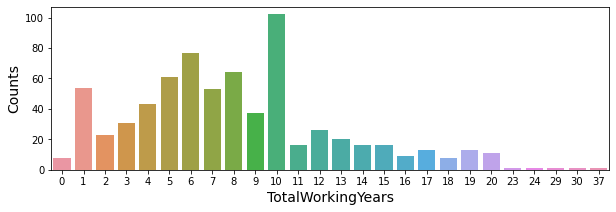

In [10214]:
#visualize this column by lineplot
plt.figure(figsize =(10,3))
sns.countplot(x = 'TotalWorkingYears', data=df)
plt.xlabel('TotalWorkingYears', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

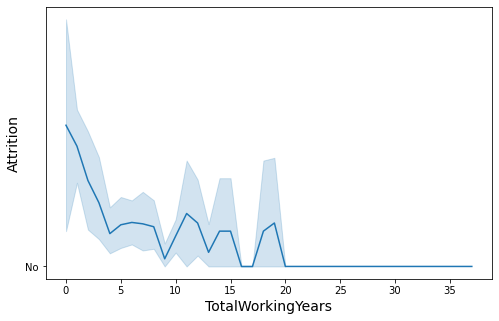

In [10215]:
#visualize this column by lineplot
plt.figure(figsize =(8,5))
sns.lineplot(x= 'TotalWorkingYears', y = 'Attrition', data=df)
plt.xlabel('TotalWorkingYears', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10216]:
df.groupby('TotalWorkingYears')['Attrition'].value_counts() #change into int

TotalWorkingYears  Attrition
0                  No            4
                   Yes           4
1                  No           31
                   Yes          23
2                  No           16
                   Yes           7
3                  No           24
                   Yes           7
4                  No           38
                   Yes           5
5                  No           52
                   Yes           9
6                  No           65
                   Yes          12
7                  No           45
                   Yes           8
8                  No           55
                   Yes           9
9                  No           36
                   Yes           1
10                 No           91
                   Yes          11
11                 No           13
                   Yes           3
12                 No           22
                   Yes           4
13                 No           19
                   Yes    

In [10217]:
df['TotalWorkingYears'].skew() #check the skewness

1.0083495771561293

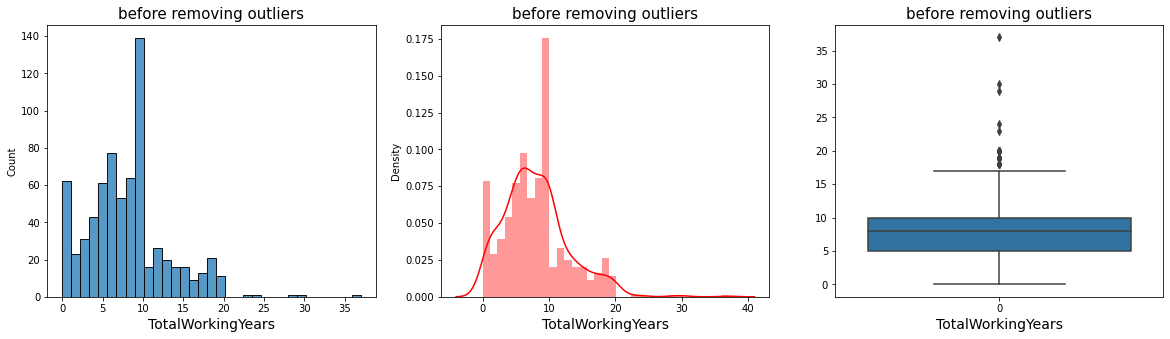

In [10218]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['TotalWorkingYears']) #visualize the outliers by using histplot
plt.title('before removing outliers', fontsize=15)
plt.xlabel('TotalWorkingYears', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['TotalWorkingYears'], color='r') #visualize the normalization curve by using distplot
plt.title('before removing outliers', fontsize=15)
plt.xlabel('TotalWorkingYears', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['TotalWorkingYears']) #visualize the outliers by using boxplot
plt.title('before removing outliers', fontsize=15)
plt.xlabel('TotalWorkingYears', fontsize= 14)
plt.show()

In [10219]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['TotalWorkingYears'].mean())
print('Median of the column:----->',df['TotalWorkingYears'].median())
print('Mode of the column:----->',st.mode(df['TotalWorkingYears']))
print('std of the column:----->',df['TotalWorkingYears'].std())

Mean of the column:-----> 8.072237960339944
Median of the column:-----> 8.0
Mode of the column:-----> 10
std of the column:-----> 4.918241608170984


In [10220]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['TotalWorkingYears'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['TotalWorkingYears'], 60,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['TotalWorkingYears'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['TotalWorkingYears'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 4.0

 **************************************************
Higher range:-
 (array([ 13,  29,  33,  36,  38,  47,  48,  51,  58,  60,  68,  80,  92,
        93, 106, 117, 123, 137, 166, 169, 182, 196, 197, 204, 212, 232,
       242, 244, 256, 257, 269, 291, 303, 323, 327, 328, 351, 356, 357,
       358, 360, 366, 381, 420, 438, 451, 458, 464, 470, 482, 491, 494,
       497, 513, 531, 547, 561, 564, 573, 576, 582, 586, 605, 613, 617,
       625, 627, 637, 655, 663, 675, 680, 692, 700, 704], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [10221]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (706, 31)
New Shape:------>  (631, 31)


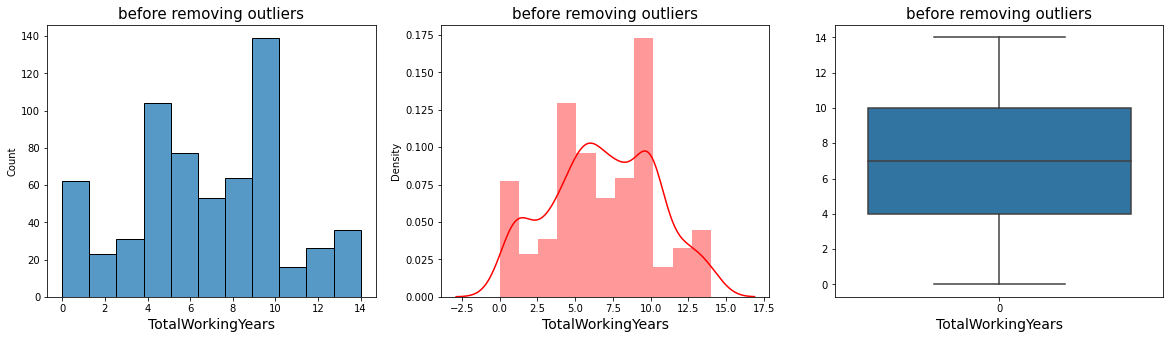

In [10222]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['TotalWorkingYears']) #visualize the outliers by using histplot
plt.title('before removing outliers', fontsize=15)
plt.xlabel('TotalWorkingYears', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['TotalWorkingYears'], color='r') #visualize the normalization curve by using distplot
plt.title('before removing outliers', fontsize=15)
plt.xlabel('TotalWorkingYears', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['TotalWorkingYears']) #visualize the outliers by using boxplot
plt.title('before removing outliers', fontsize=15)
plt.xlabel('TotalWorkingYears', fontsize= 14)
plt.show()

In [10223]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['TotalWorkingYears'].mean())
print('Median of the column:----->',df['TotalWorkingYears'].median())
print('Mode of the column:----->',st.mode(df['TotalWorkingYears']))
print('std of the column:----->',df['TotalWorkingYears'].std())

Mean of the column:-----> 6.87797147385103
Median of the column:-----> 7.0
Mode of the column:-----> 10
std of the column:-----> 3.4836588600425915


In [10224]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].replace(10,df['TotalWorkingYears'].mean())

In [10225]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['TotalWorkingYears'].mean())
print('Median of the column:----->',df['TotalWorkingYears'].median())
print('Mode of the column:----->',st.mode(df['TotalWorkingYears']))
print('std of the column:----->',df['TotalWorkingYears'].std())

Mean of the column:-----> 6.373301252508419
Median of the column:-----> 6.87797147385103
Mode of the column:-----> 6.87797147385103
std of the column:-----> 3.209779895300632


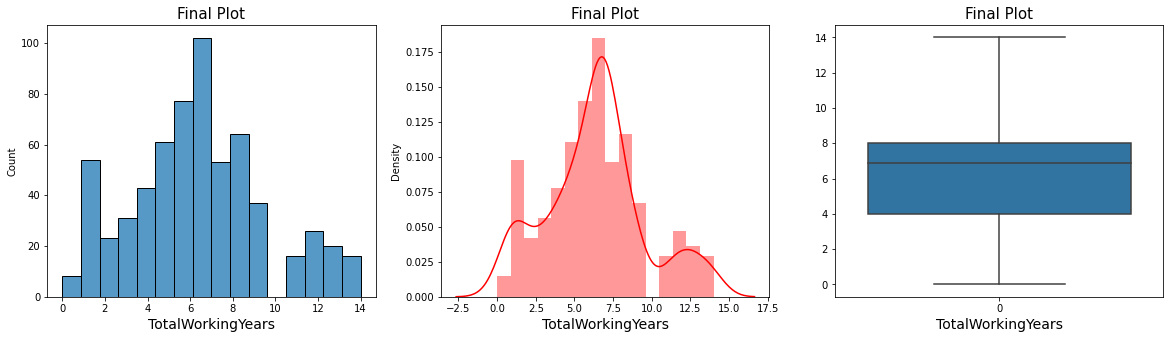

In [10226]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['TotalWorkingYears']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('TotalWorkingYears', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['TotalWorkingYears'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('TotalWorkingYears', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['TotalWorkingYears']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('TotalWorkingYears', fontsize= 14)
plt.show()

In [10227]:
df['TotalWorkingYears'].skew() #now, check the skewness

0.27962966022490876

Observation:
1. those who have zero experience there attrition rate is high
2. skewness is improved from 1 to 0.27
3. Outliers are removed
4. mean, median and mode values are improved

In [10228]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (631, 31)


# Column29: TrainingTimesLastYear

In [10229]:
df['TrainingTimesLastYear'].unique() #check the unique value

array([0, 3, 2, 5, 6, 4, 1], dtype=int64)

In [10230]:
df['TrainingTimesLastYear'].value_counts() #check the number of counts for particular value

2    223
3    212
5     58
4     50
1     30
6     30
0     28
Name: TrainingTimesLastYear, dtype: int64

In [10231]:
df['TrainingTimesLastYear'].isnull().sum() #check the null value

0

Text(0, 0.5, 'Counts')

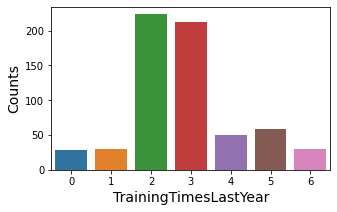

In [10232]:
#visualize this column by lineplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'TrainingTimesLastYear', data=df)
plt.xlabel('TrainingTimesLastYear', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

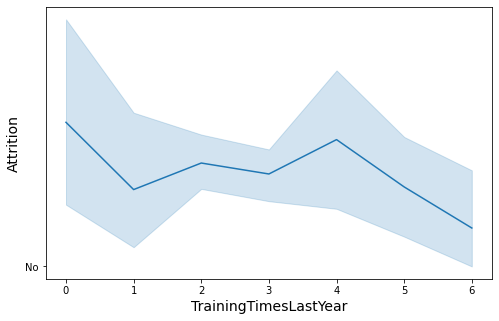

In [10233]:
#visualize this column by lineplot
plt.figure(figsize =(8,5))
sns.lineplot(x= 'TrainingTimesLastYear', y = 'Attrition', data=df)
plt.xlabel('TrainingTimesLastYear', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10234]:
df.groupby('TrainingTimesLastYear')['Attrition'].value_counts() #change into int value

TrainingTimesLastYear  Attrition
0                      No            21
                       Yes            7
1                      No            26
                       Yes            4
2                      No           183
                       Yes           40
3                      No           178
                       Yes           34
4                      No            39
                       Yes           11
5                      No            50
                       Yes            8
6                      No            28
                       Yes            2
Name: Attrition, dtype: int64

Observation:
1. 2 or 3 years training time is high
2. But those who have zero training years their attrition rate is higher 

In [10235]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (631, 31)


# Column30: WorkLifeBalance

In [10236]:
df['WorkLifeBalance'].unique() #check the unique value

array([1, 3, 2, 4], dtype=int64)

In [10237]:
df['WorkLifeBalance'].value_counts() #check the number of counts for particular value

3    381
2    145
4     70
1     35
Name: WorkLifeBalance, dtype: int64

In [10238]:
df['WorkLifeBalance'].isnull().sum() #check the null values

0

Text(0, 0.5, 'Counts')

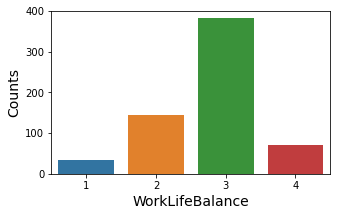

In [10239]:
#visualize this column by lineplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'WorkLifeBalance', data=df)
plt.xlabel('WorkLifeBalance', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

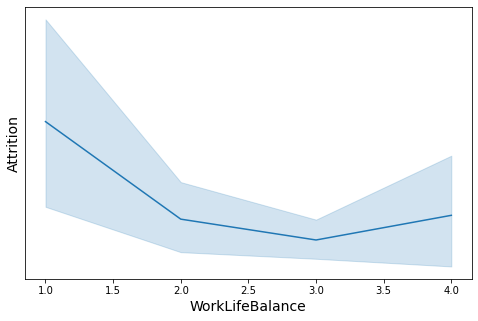

In [10240]:
#visualize this column by lineplot
plt.figure(figsize =(8,5))
sns.lineplot(x= 'WorkLifeBalance', y = 'Attrition', data=df)
plt.xlabel('WorkLifeBalance', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10241]:
df.groupby('WorkLifeBalance')['Attrition'].value_counts()
#check the relationship between feature and label

WorkLifeBalance  Attrition
1                No            23
                 Yes           12
2                No           119
                 Yes           26
3                No           326
                 Yes           55
4                No            57
                 Yes           13
Name: Attrition, dtype: int64

Observation:
1. those who have poor worklife balance their attrition rate is high

In [10242]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (631, 31)


# Column31: YearsAtCompany

In [10243]:
df['YearsAtCompany'].unique() #check the unique value

array([ 6,  0,  8,  7,  1,  3,  4,  9, 10,  2,  5, 11, 12, 13, 14],
      dtype=int64)

In [10244]:
df['YearsAtCompany'].value_counts() #check the number of counts for particular value

5     92
1     80
2     69
3     69
4     56
10    52
6     46
7     43
8     37
9     32
0     31
11    13
13     5
12     3
14     3
Name: YearsAtCompany, dtype: int64

In [10245]:
df['YearsAtCompany'].isnull().sum() #check the null values

0

Text(0, 0.5, 'Counts')

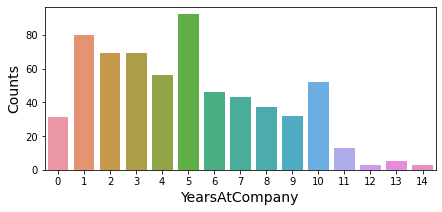

In [10246]:
#visualize this column by lineplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'YearsAtCompany', data=df)
plt.xlabel('YearsAtCompany', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

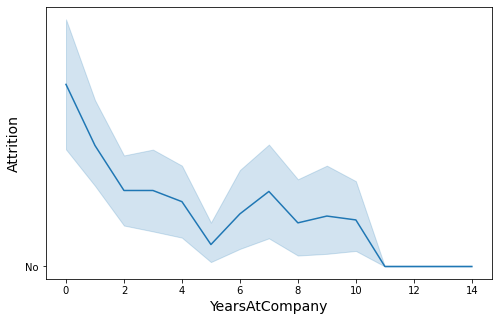

In [10247]:
#visualize this column by lineplot
plt.figure(figsize =(8,5))
sns.lineplot(x= 'YearsAtCompany', y = 'Attrition', data=df)
plt.xlabel('YearsAtCompany', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10248]:
df.groupby('YearsAtCompany')['Attrition'].value_counts()
#check the relationship between feature and label

YearsAtCompany  Attrition
0               No           17
                Yes          14
1               No           56
                Yes          24
2               No           56
                Yes          13
3               No           56
                Yes          13
4               No           47
                Yes           9
5               No           87
                Yes           5
6               No           40
                Yes           6
7               No           35
                Yes           8
8               No           33
                Yes           4
9               No           28
                Yes           4
10              No           46
                Yes           6
11              No           13
12              No            3
13              No            5
14              No            3
Name: Attrition, dtype: int64

In [10249]:
df['YearsAtCompany'].skew() #check the skewness

0.45295618221420764

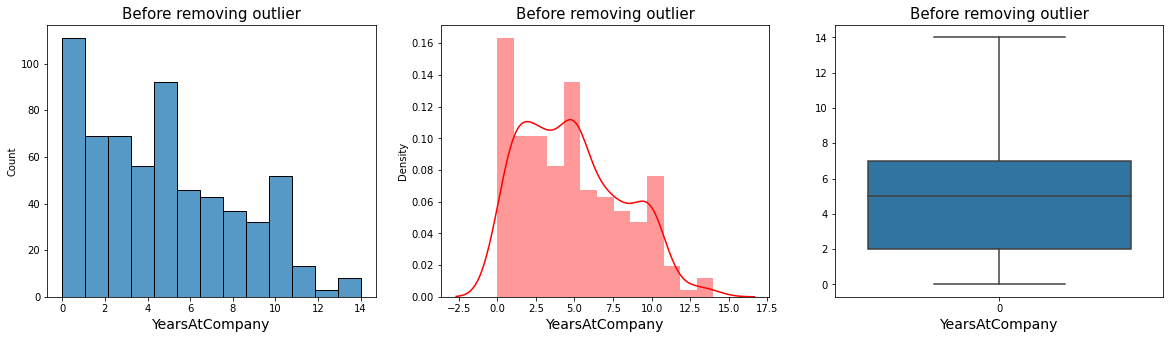

In [10250]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['YearsAtCompany']) #visualize the outliers by using histplot
plt.title('Before removing outlier', fontsize=15)
plt.xlabel('YearsAtCompany', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['YearsAtCompany'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outlier', fontsize=15)
plt.xlabel('YearsAtCompany', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['YearsAtCompany']) #visualize the outliers by using boxplot
plt.title('Before removing outlier', fontsize=15)
plt.xlabel('YearsAtCompany', fontsize= 14)
plt.show()

In [10251]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['YearsAtCompany'].mean())
print('Median of the column:----->',df['YearsAtCompany'].median())
print('Mode of the column:----->',st.mode(df['YearsAtCompany']))
print('std of the column:----->',df['YearsAtCompany'].std())

Mean of the column:-----> 4.874801901743265
Median of the column:-----> 5.0
Mode of the column:-----> 5
std of the column:-----> 3.221729139945031


In [10252]:
df['YearsAtCompany'] = df['YearsAtCompany'].replace(5,df['YearsAtCompany'].mean())

In [10253]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['YearsAtCompany'].mean())
print('Median of the column:----->',df['YearsAtCompany'].median())
print('Mode of the column:----->',st.mode(df['YearsAtCompany']))
print('std of the column:----->',df['YearsAtCompany'].std())

Mean of the column:-----> 4.856547979335002
Median of the column:-----> 4.874801901743265
Mode of the column:-----> 4.874801901743265
std of the column:-----> 3.2213220783816023


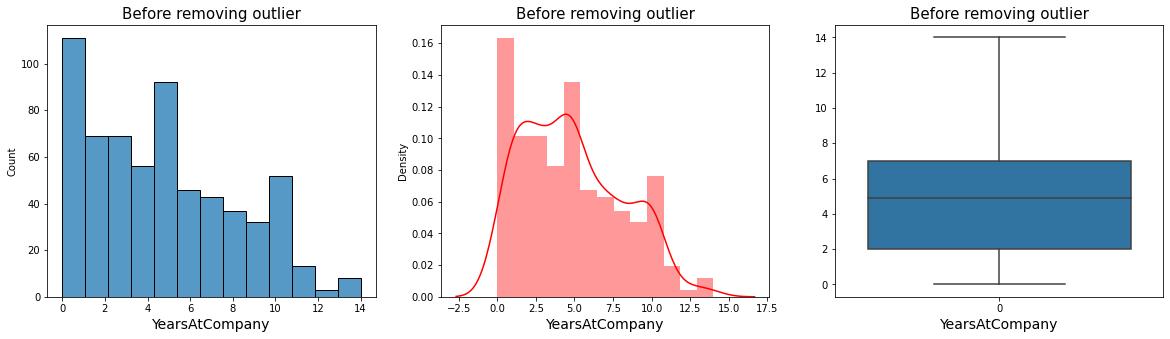

In [10254]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['YearsAtCompany']) #visualize the outliers by using histplot
plt.title('Before removing outlier', fontsize=15)
plt.xlabel('YearsAtCompany', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['YearsAtCompany'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outlier', fontsize=15)
plt.xlabel('YearsAtCompany', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['YearsAtCompany']) #visualize the outliers by using boxplot
plt.title('Before removing outlier', fontsize=15)
plt.xlabel('YearsAtCompany', fontsize= 14)
plt.show()

In [10255]:
df['YearsAtCompany'].skew() #now check the skewness

0.4701733329977817

In [10256]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['YearsAtCompany'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['YearsAtCompany'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['YearsAtCompany'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['YearsAtCompany'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 4.0

 **************************************************
Higher range:-
 (array([ 67, 116, 124, 162, 250, 358, 364, 419, 445, 606, 620], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [10257]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (631, 31)
New Shape:------>  (620, 31)


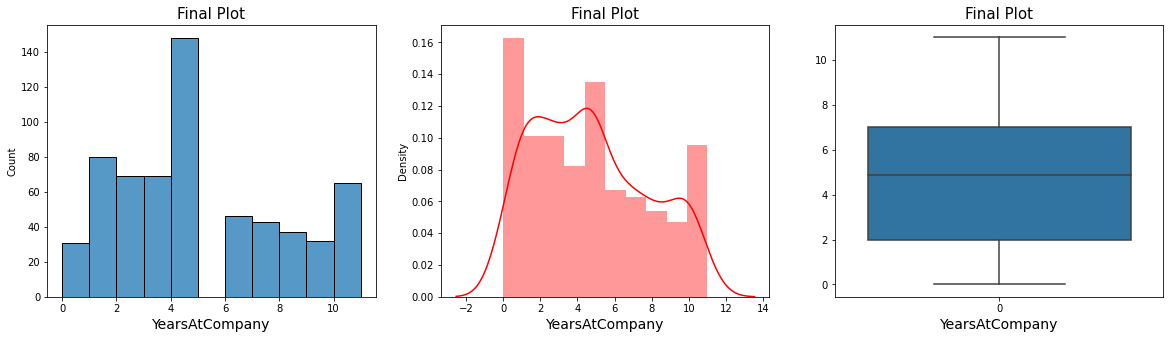

In [10258]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['YearsAtCompany']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('YearsAtCompany', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['YearsAtCompany'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('YearsAtCompany', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['YearsAtCompany']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('YearsAtCompany', fontsize= 14)
plt.show()

In [10259]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['YearsAtCompany'].mean())
print('Median of the column:----->',df['YearsAtCompany'].median())
print('Mode of the column:----->',st.mode(df['YearsAtCompany']))
print('std of the column:----->',df['YearsAtCompany'].std())

Mean of the column:-----> 4.712067378968363
Median of the column:-----> 4.874801901743265
Mode of the column:-----> 4.874801901743265
std of the column:-----> 3.0581443578519165


In [10260]:
df['YearsAtCompany'].skew() #final skewness

0.35667923169302923

Observation:
1. skewness is improved from  0.45 to 0.35
2. no null values and no zero value in data
3. mean, median, mode improved
4. those who have less year at company their attrition rate is higher

In [10261]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (620, 31)


# Column32: YearsInCurrentRole

In [10262]:
df['YearsInCurrentRole'].unique() #check the unique value

array([ 4,  0,  7,  2,  1,  3,  6,  5,  8, 10,  9], dtype=int64)

In [10263]:
df['YearsInCurrentRole'].value_counts() #check the number of counts for particular value

2     193
0     124
7      90
3      70
4      47
1      28
8      21
5      19
9      18
6       7
10      3
Name: YearsInCurrentRole, dtype: int64

In [10264]:
df['YearsInCurrentRole'].isnull().sum() #check the null

0

Text(0, 0.5, 'Counts')

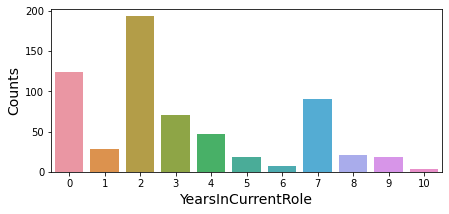

In [10265]:
#visualize this column by lineplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'YearsInCurrentRole', data=df)
plt.xlabel('YearsInCurrentRole', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

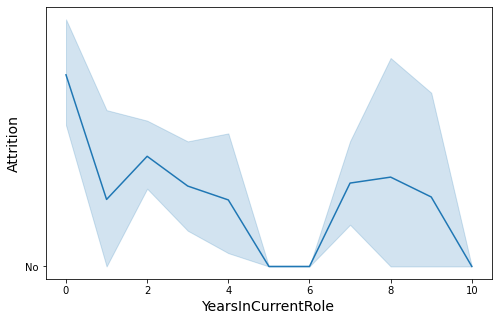

In [10266]:
#visualize this column by lineplot
plt.figure(figsize =(8,5))
sns.lineplot(x= 'YearsInCurrentRole', y = 'Attrition', data=df)
plt.xlabel('YearsInCurrentRole', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10267]:
df.groupby('YearsInCurrentRole')['Attrition'].value_counts() 
#check the number of counts for particular value

YearsInCurrentRole  Attrition
0                   No            86
                    Yes           38
1                   No            25
                    Yes            3
2                   No           159
                    Yes           34
3                   No            61
                    Yes            9
4                   No            42
                    Yes            5
5                   No            19
6                   No             7
7                   No            78
                    Yes           12
8                   No            18
                    Yes            3
9                   No            16
                    Yes            2
10                  No             3
Name: Attrition, dtype: int64

In [10268]:
df['YearsInCurrentRole'].skew() #check the skewness

0.716745229772707

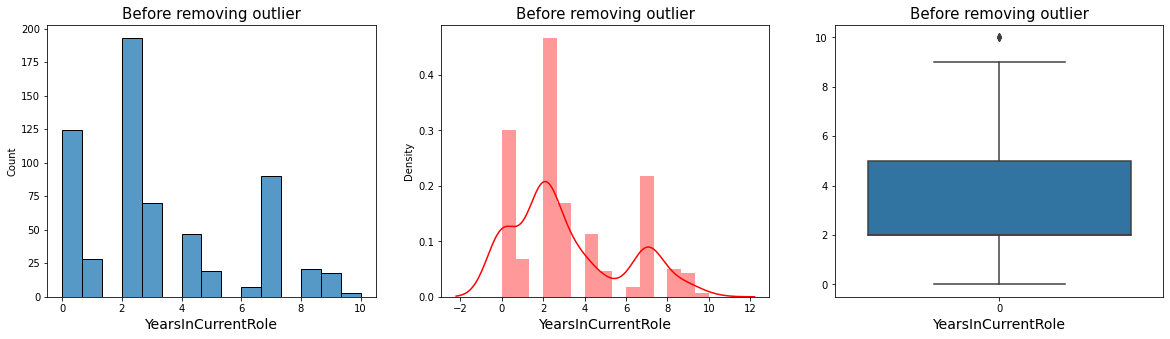

In [10269]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['YearsInCurrentRole']) #visualize the outliers by using histplot
plt.title('Before removing outlier', fontsize=15)
plt.xlabel('YearsInCurrentRole', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['YearsInCurrentRole'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outlier', fontsize=15)
plt.xlabel('YearsInCurrentRole', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['YearsInCurrentRole']) #visualize the outliers by using boxplot
plt.title('Before removing outlier', fontsize=15)
plt.xlabel('YearsInCurrentRole', fontsize= 14)
plt.show()

In [10270]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['YearsInCurrentRole'].mean())
print('Median of the column:----->',df['YearsInCurrentRole'].median())
print('Mode of the column:----->',st.mode(df['YearsInCurrentRole']))
print('std of the column:----->',df['YearsInCurrentRole'].std())

Mean of the column:-----> 3.1274193548387097
Median of the column:-----> 2.0
Mode of the column:-----> 2
std of the column:-----> 2.6530483186719342


In [10271]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['YearsInCurrentRole'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['YearsInCurrentRole'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['YearsInCurrentRole'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['YearsInCurrentRole'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 3.0

 **************************************************
Higher range:-
 (array([ 35, 377, 544], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [10272]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (620, 31)
New Shape:------>  (617, 31)


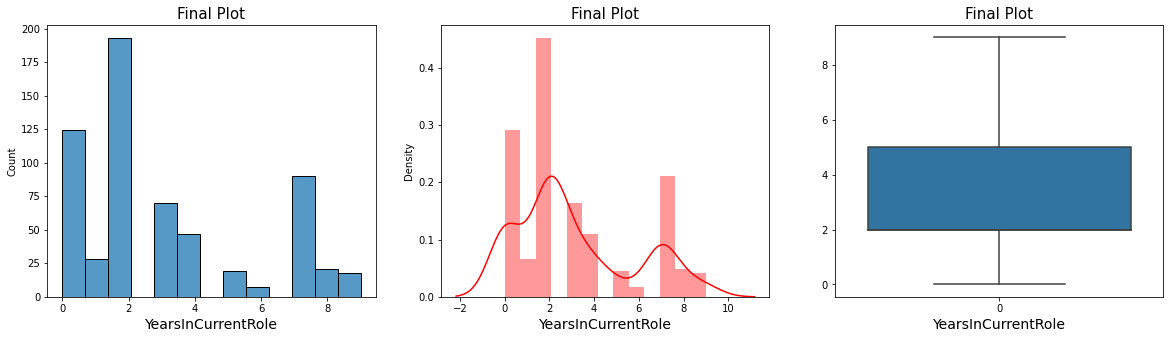

In [10273]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['YearsInCurrentRole']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('YearsInCurrentRole', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['YearsInCurrentRole'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('YearsInCurrentRole', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['YearsInCurrentRole']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('YearsInCurrentRole', fontsize= 14)
plt.show()

In [10274]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['YearsInCurrentRole'].mean())
print('Median of the column:----->',df['YearsInCurrentRole'].median())
print('Mode of the column:----->',st.mode(df['YearsInCurrentRole']))
print('std of the column:----->',df['YearsInCurrentRole'].std())

Mean of the column:-----> 3.094003241491086
Median of the column:-----> 2.0
Mode of the column:-----> 2
std of the column:-----> 2.615683160494286


In [10275]:
df['YearsInCurrentRole'].skew() #check the skewness

0.7013844459053216

Observation:
1. no null values and no zeros present in data
2. skewness is improved from 0.71 to 0.70
3. those people who have less years at current role, their attrition rate is higher

In [10276]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (617, 31)


# Column33:  YearsSinceLastPromotion

In [10277]:
df['YearsSinceLastPromotion'].unique()  #check the unique value

array([0, 3, 1, 4, 2, 5, 7, 6, 9, 8], dtype=int64)

In [10278]:
df['YearsSinceLastPromotion'].value_counts() #check the number of counts for particular value

0    283
1    176
2     72
7     32
4     13
3     12
5     12
8      7
6      6
9      4
Name: YearsSinceLastPromotion, dtype: int64

In [10279]:
df['YearsSinceLastPromotion'].isnull().sum() #check the null value

0

Text(0, 0.5, 'Counts')

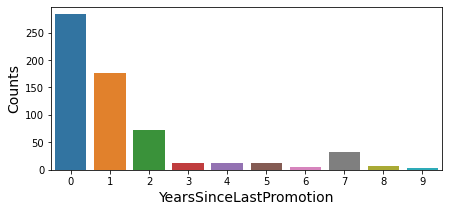

In [10280]:
#visualize this column by lineplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'YearsSinceLastPromotion', data=df)
plt.xlabel('YearsSinceLastPromotion', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

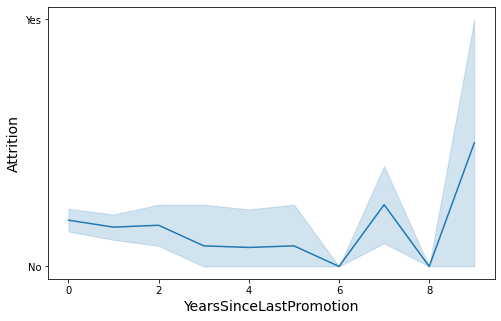

In [10281]:
#visualize this column by lineplot
plt.figure(figsize =(8,5))
sns.lineplot(x= 'YearsSinceLastPromotion', y = 'Attrition', data=df)
plt.xlabel('YearsSinceLastPromotion', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10282]:
df.groupby('YearsSinceLastPromotion')['Attrition'].value_counts()
#check the relationship between feature and label

YearsSinceLastPromotion  Attrition
0                        No           230
                         Yes           53
1                        No           148
                         Yes           28
2                        No            60
                         Yes           12
3                        No            11
                         Yes            1
4                        No            12
                         Yes            1
5                        No            11
                         Yes            1
6                        No             6
7                        No            24
                         Yes            8
8                        No             7
9                        No             2
                         Yes            2
Name: Attrition, dtype: int64

Observation:
1. those who have many years since last promotion, their attrition rate is higher 

In [10283]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (617, 31)


# Column34: YearsWithCurrManager

In [10284]:
df['YearsWithCurrManager'].unique() #check the unique value

array([ 5,  0,  6,  2,  3,  8,  4,  1,  7,  9, 10], dtype=int64)

In [10285]:
df['YearsWithCurrManager'].value_counts() #check the number of counts for particular value

2     186
0     128
7      81
3      72
4      48
1      34
8      28
5      18
9      14
6       7
10      1
Name: YearsWithCurrManager, dtype: int64

In [10286]:
df['YearsWithCurrManager'].isnull().sum() #check the null value

0

In [10287]:
df['YearsWithCurrManager'].skew() #check the skewness

0.7367016156118924

Text(0, 0.5, 'Counts')

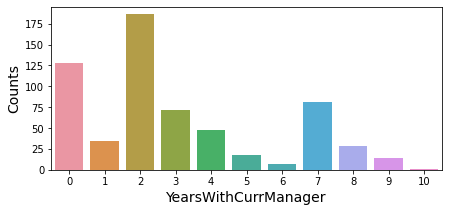

In [10288]:
#visualize this column by lineplot
plt.figure(figsize =(7,3))
sns.countplot(x = 'YearsWithCurrManager', data=df)
plt.xlabel('YearsWithCurrManager', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

Text(0, 0.5, 'Attrition')

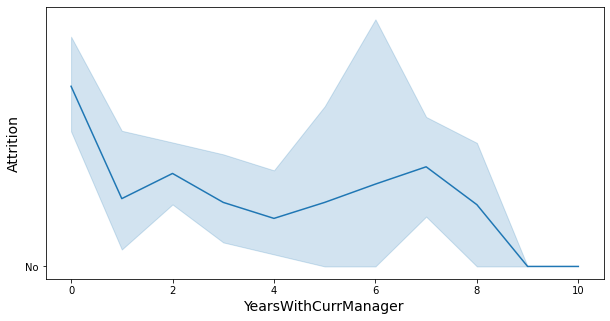

In [10289]:
#visualize this column by lineplot
plt.figure(figsize =(10,5))
sns.lineplot(x= 'YearsWithCurrManager', y = 'Attrition', data=df)
plt.xlabel('YearsWithCurrManager', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)

In [10290]:
df.groupby('YearsWithCurrManager')['Attrition'].value_counts()
#check the relationship between feature and label

YearsWithCurrManager  Attrition
0                     No            88
                      Yes           40
1                     No            30
                      Yes            4
2                     No           156
                      Yes           30
3                     No            64
                      Yes            8
4                     No            44
                      Yes            4
5                     No            16
                      Yes            2
6                     No             6
                      Yes            1
7                     No            67
                      Yes           14
8                     No            25
                      Yes            3
9                     No            14
10                    No             1
Name: Attrition, dtype: int64

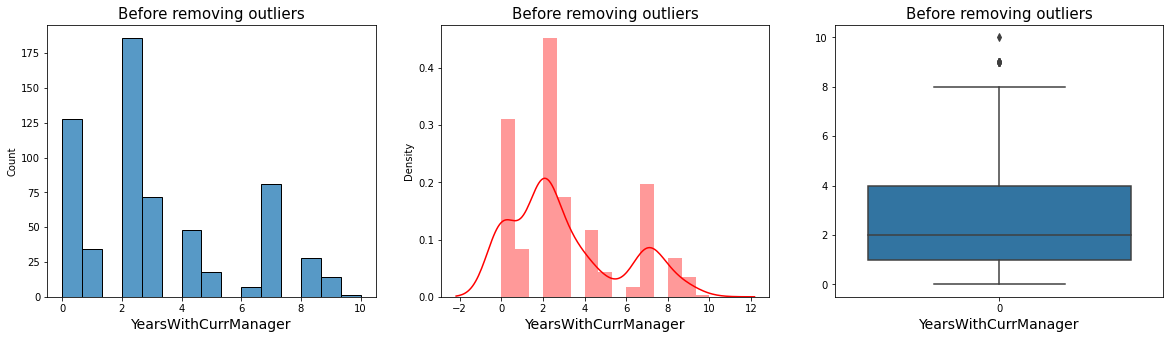

In [10291]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['YearsWithCurrManager']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('YearsWithCurrManager', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['YearsWithCurrManager'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('YearsWithCurrManager', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['YearsWithCurrManager']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('YearsWithCurrManager', fontsize= 14)
plt.show()

In [10292]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['YearsWithCurrManager'].mean())
print('Median of the column:----->',df['YearsWithCurrManager'].median())
print('Mode of the column:----->',st.mode(df['YearsWithCurrManager']))
print('std of the column:----->',df['YearsWithCurrManager'].std())

Mean of the column:-----> 3.0356564019448946
Median of the column:-----> 2.0
Mode of the column:-----> 2
std of the column:-----> 2.6127856083106966


In [10293]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['YearsWithCurrManager'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['YearsWithCurrManager'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['YearsWithCurrManager'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['YearsWithCurrManager'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 3.0

 **************************************************
Higher range:-
 (array([ 29,  57,  89, 103, 134, 228, 364, 367, 482, 493, 496, 571, 582,
       586, 609], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [10294]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (617, 31)
New Shape:------>  (602, 31)


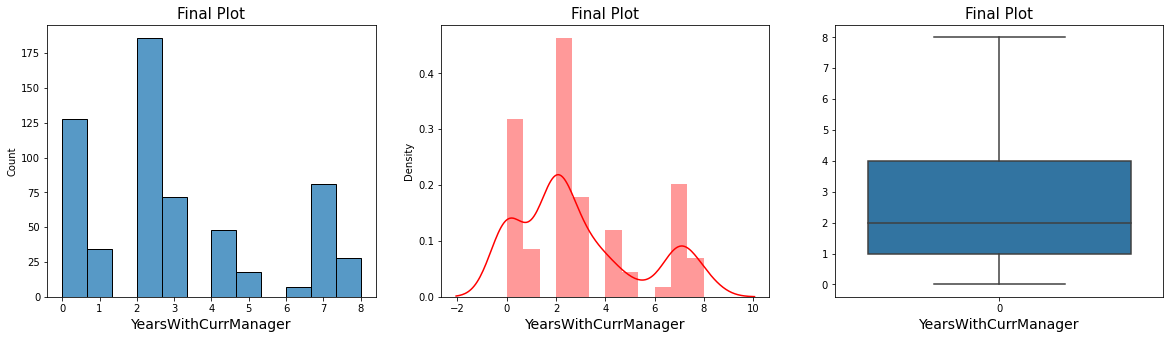

In [10295]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['YearsWithCurrManager']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('YearsWithCurrManager', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['YearsWithCurrManager'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('YearsWithCurrManager', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['YearsWithCurrManager']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('YearsWithCurrManager', fontsize= 14)
plt.show()

In [10296]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['YearsWithCurrManager'].mean())
print('Median of the column:----->',df['YearsWithCurrManager'].median())
print('Mode of the column:----->',st.mode(df['YearsWithCurrManager']))
print('std of the column:----->',df['YearsWithCurrManager'].std())

Mean of the column:-----> 2.8853820598006643
Median of the column:-----> 2.0
Mode of the column:-----> 2
std of the column:-----> 2.462730976735138


In [10297]:
df['YearsWithCurrManager'].skew() #check the skewness

0.7159098077829587

Observation:
1. skewenss is improved
2. removed outliers
3. those who have less years with current manager, their attrition rate is higher

In [10298]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (602, 31)


# Label: Attrition

In [10299]:
df['Attrition'].unique() #check the unique value

array(['Yes', 'No'], dtype=object)

In [10300]:
df['Attrition'].value_counts() #check the number of counts for particular value

No     496
Yes    106
Name: Attrition, dtype: int64

Text(0, 0.5, 'Counts')

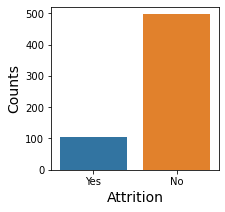

In [10301]:
#visualize this column by lineplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'Attrition', data=df)
plt.xlabel('Attrition', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [10302]:
Atr = ['Yes', 'No']
Atr1 = [106,496] #making dataframes

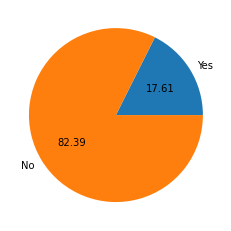

In [10303]:
plt.pie(Atr1, labels = Atr, autopct = '%.2f')
plt.show() #visualize by pieplot

In [10304]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0}) #change into int

In [10305]:
df['Attrition'].unique() #now check the unique values

array([1, 0], dtype=int64)

Observation:
1. chances of attrition is less. 
2. yes to quit job is 106 and No is 514
3. in terms of percentage, we can see, only 17.61% for No and 82.39% for yes

In [10306]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (602, 31)


correlation between the Features and with label:-----> (31, 31)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

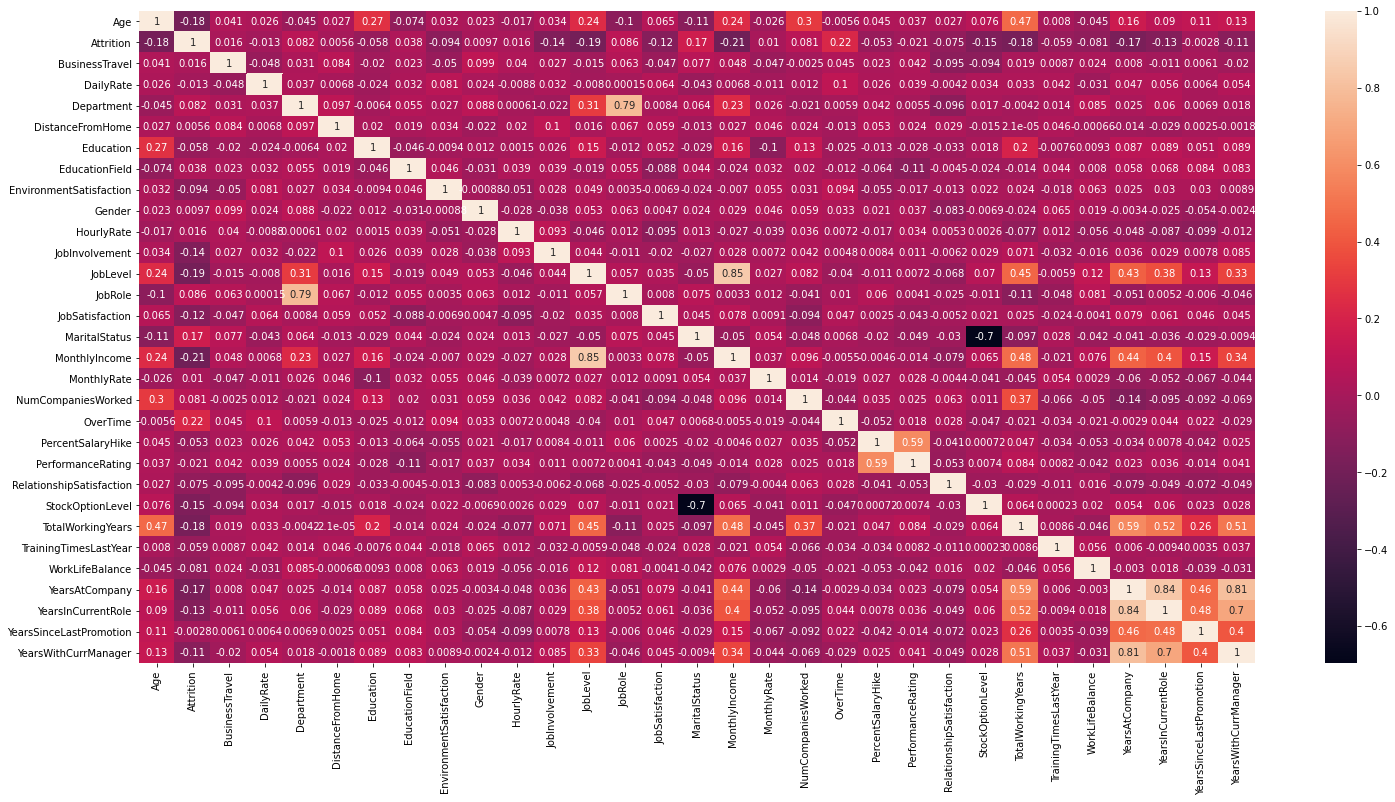

In [10307]:
# Check the correlation 
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(25,12))
sns.heatmap(corr, annot=True)
plt.show 

In [10308]:
#split x and y
x = df.drop(['Attrition'], axis=1)
y=df.Attrition

In [10309]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 0.92694768,  0.6018424 ,  0.73789294, ...,  0.38898819,
        -0.65377237,  0.85936161],
       [ 0.42549072,  0.6018424 ,  1.40357139, ..., -1.17475731,
        -0.65377237, -1.17259318],
       [-0.07596625, -0.93989856,  1.45024258, ...,  1.5617973 ,
         0.83891145, -1.17259318],
       ...,
       [-0.95351593,  0.6018424 ,  0.89755751, ..., -0.39288456,
        -0.65377237, -1.17259318],
       [-0.82815169,  0.6018424 , -1.58829709, ..., -0.39288456,
        -0.65377237,  0.04657969],
       [ 0.04939799,  0.6018424 , -0.42643026, ..., -0.00194819,
        -0.1562111 , -0.35981126]])

In [10310]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif 

,vif,features
0,1.462450,Age
1,1.086528,BusinessTravel
2,1.044812,DailyRate
3,3.401108,Department
4,1.052548,DistanceFromHome
5,1.123623,Education
6,1.064758,EducationField
7,1.050934,EnvironmentSatisfaction
8,1.059501,Gender
9,1.066206,HourlyRate


In [10311]:
x = df.drop(['YearsAtCompany'], axis=1) #high collinearity, so, we need to drop this column

In [10312]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [10313]:
y_train.head()

1291    1
860     1
822     0
1115    0
613     0
Name: Attrition, dtype: int64

# Logistic Regression

In [10314]:
#Model instantiating and training
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [10315]:
#Train the model
log_reg.score(x_train, y_train)

0.8869179600886918

In [10316]:
#Let's check how well model fits the test data
log_reg.score(x_test,y_test)

0.8211920529801324

In [10317]:
#make predictions
pred_test= log_reg.predict(x_test)

In [10318]:
#Cross validation score for logistic regression
lr_cv = log_reg.predict(x_test)

lr_acc= accuracy_score(y_test,lr_cv)


for i in range (2,10):
    lr_score= cross_val_score(log_reg,x,y,cv=i)
    lr_sc=lr_score.mean()
    print( 'At CV ------',i)
    print("CV Score is -----",lr_sc*100)
    print("Accuracy Score is -----",lr_acc*100)
    print("\n")

At CV ------ 2
CV Score is ----- 83.72093023255813
Accuracy Score is ----- 82.11920529801324


At CV ------ 3
CV Score is ----- 84.55389718076285
Accuracy Score is ----- 82.11920529801324


At CV ------ 4
CV Score is ----- 84.5540838852097
Accuracy Score is ----- 82.11920529801324


At CV ------ 5
CV Score is ----- 85.05096418732782
Accuracy Score is ----- 82.11920529801324


At CV ------ 6
CV Score is ----- 85.7112211221122
Accuracy Score is ----- 82.11920529801324


At CV ------ 7
CV Score is ----- 83.38870431893686
Accuracy Score is ----- 82.11920529801324


At CV ------ 8
CV Score is ----- 82.90131578947368
Accuracy Score is ----- 82.11920529801324


At CV ------ 9
CV Score is ----- 84.88114980652294
Accuracy Score is ----- 82.11920529801324




Observation:
1. In, LogisticRegression, Accuracy is 82.1%

# Knn Classifier

In [10319]:
Classifier = KNeighborsClassifier(n_neighbors=5)
Classifier.fit(x_train,y_train) #train the model

KNeighborsClassifier()

In [10320]:
Classifier.score(x_train,y_train) #check how much our model learn

0.8647450110864745

In [10321]:
Classifier.score(x_test,y_test) #check the score

0.8145695364238411

In [10322]:
from sklearn.metrics import confusion_matrix, classification_report

In [10323]:
knn = KNeighborsClassifier()

In [10324]:
knn.fit(x_train,y_train) #now train the data

KNeighborsClassifier()

In [10325]:
y_pred = knn.predict(x_test) #predict it

In [10326]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8145695364238411

******************************************
Confusion_matrix:
 [[118   5]
 [ 23   5]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       123
           1       0.50      0.18      0.26        28

    accuracy                           0.81       151
   macro avg       0.67      0.57      0.58       151
weighted avg       0.77      0.81      0.78       151



Observation:
1. In knn Classifier, Accuracy is 81%, which is less than Logistic regression
2. So, this is not going to our best model

In [10327]:
#cross validation score to check if the model is overfitting
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x_scaled,y,cv=5)

array([0.80165289, 0.82644628, 0.825     , 0.8       , 0.85      ])

In [10328]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=5).mean()

0.8206198347107436

Observation:
1. our CV Score is 82%, it means our model is not overfitting

# Using GridSearchCV by using Knn Classifier as a estimator

In [10329]:
from sklearn.model_selection import GridSearchCV #import libraries

In [10330]:
param_grid = {'algorithm':['kdtree','brute'], 'leaf_size':[12,11,14,15,18,20,25], 'n_neighbors':[3,5,7,9,12,13]}
gridsearch = GridSearchCV(estimator=knn, param_grid= param_grid)
gridsearch.fit(x_train,y_train) #train the model

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kdtree', 'brute'],
                         'leaf_size': [12, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 12, 13]})

In [10331]:
gridsearch.best_params_ #get best parameters

{'algorithm': 'brute', 'leaf_size': 12, 'n_neighbors': 7}

In [10332]:
#put best params into knn
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size = 12, n_neighbors = 9) 

In [10333]:
knn.fit(x_train,y_train) #train the model

KNeighborsClassifier(algorithm='brute', leaf_size=12, n_neighbors=9)

In [10334]:
knn.score(x_train,y_train) #check the training score

0.8492239467849224

In [10335]:
knn.score(x_test,y_test) #check the score

0.8079470198675497

In [10336]:
y_pred = knn.predict(x_test) #predict it

In [10337]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8079470198675497

******************************************
Confusion_matrix:
 [[121   2]
 [ 27   1]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       123
           1       0.33      0.04      0.06        28

    accuracy                           0.81       151
   macro avg       0.58      0.51      0.48       151
weighted avg       0.73      0.81      0.74       151



Observation:
1. By using gridsearchCV, knn as a estimator, our accuracy score is still not improving
2. and it is 81%

# Support Vector Machine

In [10338]:
from sklearn.svm import SVC #import libraries

In [10339]:
svc = SVC()

In [10340]:
svc.fit(x_train,y_train) #train the model

SVC()

In [10341]:
svc.score(x_train,y_train) #score of training data

0.9135254988913526

In [10342]:
svc.score(x_test,y_test) #check the score

0.8145695364238411

In [10343]:
y_pred = svc.predict(x_test)

In [10344]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8145695364238411

******************************************
Confusion_matrix:
 [[120   3]
 [ 25   3]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       123
           1       0.50      0.11      0.18        28

    accuracy                           0.81       151
   macro avg       0.66      0.54      0.54       151
weighted avg       0.77      0.81      0.76       151



Observation:
1. Accuracy score is 81.4% better than knncalssifier but not better than logistic regression
2. so, this is not going to be our best model

# Using gridsearchCV, SVC as a estimator

In [10345]:
param_grid = {'C': [0.001,1,2,4,5,6,7,9,10],
             'gamma': [0.7,0.2,0.3,0.4,0.5,0.6,0.8],
             'kernel': ['rbf']}

In [10346]:
gridsearch = GridSearchCV(SVC(), param_grid)

In [10347]:
gridsearch.fit(x_train,y_train) #train the model

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 1, 2, 4, 5, 6, 7, 9, 10],
                         'gamma': [0.7, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8],
                         'kernel': ['rbf']})

In [10348]:
gridsearch.best_params_ #get the best parameter

{'C': 0.001, 'gamma': 0.7, 'kernel': 'rbf'}

In [10349]:
svc = SVC(C=1, gamma=0.2) #put the params in svm

In [10350]:
svc.fit(x_train,y_train) #train the model

SVC(C=1, gamma=0.2)

In [10351]:
svc.score(x_train,y_train) #get the score of training data

1.0

In [10352]:
svc.score(x_test,y_test) #check the score

0.8145695364238411

In [10353]:
y_pred = svc.predict(x_test)

In [10354]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8145695364238411

******************************************
Confusion_matrix:
 [[123   0]
 [ 28   0]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       123
           1       0.00      0.00      0.00        28

    accuracy                           0.81       151
   macro avg       0.41      0.50      0.45       151
weighted avg       0.66      0.81      0.73       151



Observation:
1. Accuarcy is still 81.4%, not better than logistic regression

# Plot ROC/AUC for multiple models

In [10355]:
log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
rf= RandomForestClassifier()
knn = KNeighborsClassifier()

In [10356]:
#train the model
log_reg.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
print("all models are trained")

all models are trained


In [10357]:
log_reg.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
knn.score(x_test,y_test)
print("all models score are captured")

all models score are captured


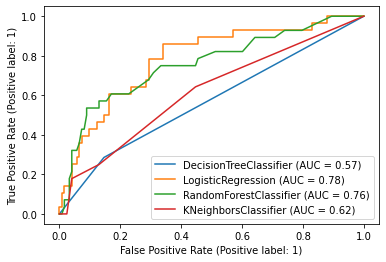

In [10358]:
#how well out model works on test data
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(log_reg,x_test,y_test, ax= disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax= disp.ax_)
plot_roc_curve(knn,x_test,y_test, ax= disp.ax_)
plt.show()

# RandomForestClassifier

In [10359]:
rf= RandomForestClassifier()

In [10360]:
rf.fit(x_train,y_train)#train the model

RandomForestClassifier()

In [10361]:
rf.score(x_train,y_train) # training data score

1.0

In [10362]:
rf.score(x_test,y_test) #testing data score

0.8145695364238411

In [10363]:
y_pred=rf.predict(x_test)

In [10364]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8145695364238411

******************************************
Confusion_matrix:
 [[120   3]
 [ 25   3]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       123
           1       0.50      0.11      0.18        28

    accuracy                           0.81       151
   macro avg       0.66      0.54      0.54       151
weighted avg       0.77      0.81      0.76       151



Observation:
1. Accuarcy score of randomforestclassifier is 81%, not more than logistic regression
2. this is also not going to be our best model

# using gridsearchcv by using random forest classifier as a estimator

In [10365]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

In [10366]:
grd = GridSearchCV(rf, param_grid=params)
grd.fit(x_train,y_train)
print('best_param - ', grd.best_params_) #get the best parameter

best_param -  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}


In [10367]:
#Check the accuarcy of our model
clf = grd.best_estimator_
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
rf_cfm = confusion_matrix(y_test, y_pred)

In [10368]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , rf_cfm)
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8211920529801324

******************************************
Confusion_matrix:
 [[119   4]
 [ 23   5]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       123
           1       0.56      0.18      0.27        28

    accuracy                           0.82       151
   macro avg       0.70      0.57      0.58       151
weighted avg       0.79      0.82      0.78       151



Observation:
1. Accuarcy is still not improving and it is 81.4%

# Using PCA Technique with svm

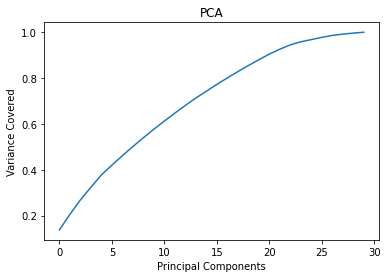

In [10369]:
pca =PCA()
pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [10370]:
pca = PCA(n_components=29)
p_newcomp = pca.fit_transform(x_scaled)
princi_comp = pd.DataFrame(p_newcomp, columns= ['Age','Business Travel','DailyRate','Department','DistanceFromHome','Education','EducationField','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','jobSatisfaction','MaritialStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','trainingTimesLastYear','workLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])
princi_comp

,Age,Business Travel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,trainingTimesLastYear,workLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.645300,1.512481,0.989629,1.309358,-1.981027,0.372790,-0.988768,1.586573,-1.113426,1.437158,...,-0.078069,0.953565,-0.675831,-0.210890,-0.517263,0.524092,0.751125,-0.753793,-0.119001,-0.097028
1,-2.325415,-0.739580,0.153044,1.032414,-1.419991,1.321395,-1.859793,0.386435,-1.156990,1.023384,...,-0.835357,1.475501,-0.082694,-0.043758,0.342154,0.205763,-0.174258,0.331707,-0.458478,0.183515
2,0.651672,-0.289092,-1.320903,-0.589182,-0.445105,-0.927596,-2.578126,0.044846,-0.848235,0.823023,...,1.480177,-0.230707,0.102729,-0.384736,-0.710781,-1.223036,-1.664948,-0.515013,0.207407,0.142221
3,1.159790,-1.019033,-2.583988,0.906946,0.430646,-0.030282,-1.056462,0.855373,1.196119,-0.679387,...,-0.375082,-0.031407,0.022726,0.233163,0.312505,-0.050140,-0.425358,0.107713,-0.548843,-0.462658
4,-0.451690,-2.378499,4.008969,2.003753,2.090276,1.943086,-1.205642,-0.294522,-2.604439,1.399020,...,-0.737661,0.016606,0.929440,1.765470,-0.868968,1.349416,-1.290134,1.322640,-0.242464,-0.216234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,-0.746224,-0.470505,-0.204236,0.739715,-1.216224,-0.514740,-0.686269,2.207851,0.112977,0.173045,...,0.776098,-0.834515,0.288344,0.082231,-0.153840,0.111799,-0.282943,0.665145,0.312336,-0.145240
598,-1.110146,-0.414230,-0.294030,-0.879531,-0.709097,-2.301325,1.008483,0.720600,-1.364488,0.741614,...,-0.767912,-1.256124,-0.288560,-0.323189,-0.429721,-0.027763,-0.342563,-0.451314,0.310043,-0.096126
599,-1.661217,2.803946,-0.530738,0.353941,0.195885,-0.869910,-1.396752,-0.270624,0.494020,1.298353,...,0.346152,-1.877435,-0.383850,0.279813,0.447229,-0.452019,-0.912480,0.614700,-0.065425,-0.064177
600,0.574726,-0.158999,1.338847,1.912359,2.259396,0.194439,1.544991,1.044350,0.194759,-0.870894,...,-0.566023,0.306481,-0.129245,-0.171376,-0.844924,0.318071,0.278524,0.329817,0.336499,-0.025683


In [10371]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(princi_comp, y,test_size = 0.25, random_state=42)

In [10372]:
svc = SVC()
svc.fit(x_train,y_train) #train the model

SVC()

In [10373]:
svc.score(x_train,y_train) #training data score

0.9135254988913526

In [10374]:
svc.score(x_test,y_test) #testing data score

0.8145695364238411

In [10375]:
y_pred = svc.predict(x_test)

In [10376]:
print('\n Accuracy Score---', accuracy_score(y_test, y_pred))


 Accuracy Score--- 0.8145695364238411


In [10377]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[120,   3],
       [ 25,   3]], dtype=int64)

In [10378]:
#To check recall
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       123
           1       0.50      0.11      0.18        28

    accuracy                           0.81       151
   macro avg       0.66      0.54      0.54       151
weighted avg       0.77      0.81      0.76       151



Observation:
1. accuracy score is 81%

# Using Gridsearchcv with princi_comp (pca new dataframe)

In [10379]:
param_grid = {'C': [0.001,2,3,4,5,6,7,10],
             'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,1],
             'kernel': ['rbf']}

In [10380]:
gridsearch = GridSearchCV(SVC(), param_grid)

In [10381]:
gridsearch.fit(x_train,y_train) #train the model

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 2, 3, 4, 5, 6, 7, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1],
                         'kernel': ['rbf']})

In [10382]:
gridsearch.best_params_ #get the best parameter

{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [10383]:
svc = SVC(C=2, gamma=0.1)

In [10384]:
svc.fit(x_train,y_train) #train the model

SVC(C=2, gamma=0.1)

In [10385]:
svc.score(x_train,y_train) #training score

1.0

In [10386]:
svc.score(x_test,y_test) #testing score

0.8278145695364238

In [10387]:
y_pred = svc.predict(x_test) 

In [10388]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8278145695364238

******************************************
Confusion_matrix:
 [[122   1]
 [ 25   3]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       123
           1       0.75      0.11      0.19        28

    accuracy                           0.83       151
   macro avg       0.79      0.55      0.55       151
weighted avg       0.82      0.83      0.77       151



Observation:
1. Accuarcy score is 82.7%

# Creating pipeline and predict the score with svm

In [10389]:
pipe = Pipeline([('Scaler',StandardScaler()),
                ('PCA',PCA(n_components=29)),
                ('SVM',SVC(C=7, gamma = 0.1))])

In [10390]:
pipe.fit(x_train,y_train) #train the model

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=29)),
                ('SVM', SVC(C=7, gamma=0.1))])

In [10391]:
pipe.score(x_train,y_train) #training score

1.0

In [10392]:
pipe.score(x_test,y_test) #testing score

0.8145695364238411

In [10393]:
y_pred = pipe.predict(x_test)

In [10394]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8145695364238411

******************************************
Confusion_matrix:
 [[123   0]
 [ 28   0]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       123
           1       0.00      0.00      0.00        28

    accuracy                           0.81       151
   macro avg       0.41      0.50      0.45       151
weighted avg       0.66      0.81      0.73       151



Observation:
1. Accuracy score is 81%

# Saving the model

Observation:
1. We decided logistic regression is our best model

In [10396]:
with open('HR_Analytics','wb') as f:
    pickle.dump(log_reg,f)